# CS109/AC 209A: Introduction to Data Science

## Group Project 
**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Pavlos Protopapas, Kevin A. Rader**<br>
**Due Date: ** Wednesday, December 12th, 2018 at 11:59pm


---

## Injecting Diversity into Spotify Music Recommendations



##### Url: 

**Group #44:**

-- Collaborator 1: Anna Davydova davydova@g.harvard.edu

-- Collaborator 2: Michael S. Emanuel mse999@g.harvard.edu

-- Collaborator 3: Avriel Epps avrielepps@g.harvard.edu

-- Collaborator 4: Erin Williams erinwilliams@g.harvard.edu




In [7]:
#some usual imports
import numpy as np
import os
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plteconds
import time
import matplotlib.pyplot as plt
from typing import List, Dict, Optional


In [3]:
#import spotipy with a developers id and passcode

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid ="07ca03cba8534f969d080936d5833062"
 
secret = "fbfcbbd68f884d5e887d7b502f97a036"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

---

## Prelude

### <center> This is Anna.  She is an avid music lover and Spotify user.  She loves EDM, Hip Hop and Classical Music.</center>

<img width="600" length='1200' alt="portfolio_view" src=anna_thinking.png>

source: licensed Adobe photo stock image with added text

### <center> These are Anna's top 3 playlists built with Spotify's current recommender algorithm </center>

<img width="1000" length='1500' alt="portfolio_view" src=old_playlist.png>

source: spotify app, team #44 playlists

### <center> These are 3 playlists created for Anna by Team #44 neural network model </center>

<img width="1000" length='1500' alt="portfolio_view" src=new_playlist.png>

source: spotify app, team #44 playlists

<img width="600" length='1200' alt="portfolio_view" src=anna123.png>

### In addition to recommending tracks that would match Anna's taste in music, team #44 algorithm promoted several mid tier female artists to improve playlist diversity.

<img width="1000" length='1500' alt="portfolio_view" src=happy_anna.png>

source: linscensed Adobe photo stock images with added text and Spotify

# Project Outline:


## Overture: 
-- Synopsis
<br>
-- Introduction

## Act 1:
-- EDA
<br>
-- Data Processing

## Act 2:
-- Model Architecture
<br>
-- Model Results


## Act 3
-- Survey Architecture
<br>
-- Survey Results


## Grand Finale:
-- Conclusions
<br>
-- Future Work
<br>
-- Citations

## Overture

### Synopsis: 

In this project we set out to develop and test a model that answers the following question: Can Spotify improve end-of-playlist track recommendation diversity, without sacrificing user satisfaction?  Specifically, our goal was to deliver a reasonably accurate track recommender that predicts the next 10 tracks for the Spotify users’ playlists with the inclusion of less known, mid-tier female artists. We built a recommender by training and testing several neural network models on Spotify's playlist data. We conditioned our best model to increase the number of mid tier female artists in its recommendations.  We then tested user satisfaction across different recommender models by conducting a survey and an experiment on a random sample of Spotify users . Our best model achieved 1.8% hit rate for track predictions vs. a simple baseline model accuracy of just 0.4%. At the same time, we increased the number of recommended mid tier female artists by over 50%. The survey results, while sparse and to be taken with a grain of salt, did highlight that our model was able to keep up with Spotify when it came to user satisfaction while promoting less known female artists.


### Introduction:
 
#### Motivation: 
It is no secret that the majority of streaming playlists are dominated by popular tracks that hinder user discovery of new and less known artists. As The Guardian succinctly puts it when comparing music experience before the rise of streaming service and to now:  “What’s different now is that the dominance of streaming rewards passivity – repeat listening – rather than active discovery” [1].  Similarly, Spotify has publicly expressed concerns about the gender bias in their algorithmically curated playlists, noting that female artists are recommended to users at significantly lower rates than male artists. [2] While, on average, female artists account for 20% of recommended artists, which is consistent with their proportion in the top 50 charts, an even smaller proportion of 11% gets Grammy nominations[3] and an even smaller proprtion yet of just 1% represents mid-tier female artists. The goal of this project was to build  a decent music recommender and explore ways that Spotify can improve diversity of its recommendations while maintaining positive user experience. 
<br>


<img width="1000" length='1000' alt="portfolio_view" src=gender.png>

source: Spotify data, Team #44 EDA

#### Definitions of Key Measures: 
<br>
--Diversity: In this analysis, we measure diversity by artist tier level (as determined by popularity) and artist gender; however, in the future we hope to build a model in which any measure of diversity (e.g., artist locale) can be plugged in and used as a metric for model success. We set a specific percentage threshold for mid-tier female artists after considering 5 artist tiers that range from “mega-pop star” to “completely unknown”. The tiers are defined by Spotify's metrics for artist popularity.
<br>
<br>
--Model Accuracy: We evaluate our model performance on the test data set by estimate how many of the last 10 tracks are predicted correctly (out of 100 attempts taken by our model). We also compare these results to a more simple probabilistic baseline model. Our recommender generates 10 possible end-of-play-list track recommendations and we then calculate the proportion of those tracks that it gets right as it takes 100 guesses to do it. We compare this accuracy metric to our baseline model. 
<br>
<br>
--User Satisfaction:  We perform an experiment with a random sample of Spotify users. We accomplish this by conducting a survey on a random sample of Harvard students, co-workers, friends, family and other folks in our social media channels. First, we collect the users' music preferences, used to generate individualized playlists. We then follow up with the survey participants. We collect user feedback about their listening experience and their overall level of satisfaction with the new, individualized playlists. Our users have been randomly split into four groups: 1) Spotify playlists, 2) our model generated playlists without the diversity injection, 3) a completely random playlist and 4)our model generated playlist that includes a significantly higher proportion of female, mid-tier artists. 

#### Key Components of Our Analysis: 

--Exploratory Data Analysis (EDA): We built several visualization to summarize the key attributes of our data. Since our interests were specific to playlist diversity, we did a deep dive on playlist architecture.  Overall, we found evidence of a significant overlap in the track recommendations for users with similar music taste and that they were predominantly male and top tier artists. We then explored features that might be helpful in our modeling of the end of playlist track recommendation. We also explored our data to ensure its quality, looking for unusual entries, missing data and duplicates etc. 
<br>
<br>
--Data Aggregation and Processing: The primary data source in this project was the 'Million Playlist Dataset' provided by Spotify as part of the RecSys Challenge 2018.
https://labs.spotify.com/2018/05/30/introducing-the-million-playlist-dataset-and-recsys-challenge-2018/
The challenge ended on June 30th of 2018, so we used an archival copy of the dataset provided to us by the course staff.
All source code for this project is on a public GitHub Respository 
https://github.com/IACS-CS-209-Group44/Spotify. We deployed our team's internal SQL expertise to transform the data  into a user friendly format and organize it for modeling purposes.  We were left with a dataset that contained 5-367 features (columns) for each playlist. Overall,we have 66 million playlist entries.
<br>
<br>
--Modeling (3 models): 
>   1.  Baseline Model: This simple model for track recommendations is based on tracks’ probability distribution. (i.e. the probability of guessing correct tracks in the last 10, based on overall tracks’ frequency adjusting for tracks that were already in the playlist).
<br>
>   2.  Playlist Name Model: This neural network model trains a recommender using playlist name and tracks in that playlist as well as tracks in other playlists that share the same name. 
<br>
>   3.  Naive Bayes Track Pair Model: Here we reached beyond the scope of the course, evaluating the relationship between track pairs in each playlists. We deployed what we learned about conditional probabilities to forecast the last 10 tracks.

<br>

--Survey (initial and follow up): At the start of our project we sent out a survey to a random group of students, colleagues, friends, family members and other folks in our social media channels. The survey asked the participant to share three Spotify playlists with us. We used this data to make end-of-playlist  10 track recommendations for our participants that we randomly split into 4 groups to compare user satisfaction with a regular Spotify playlist, random uninformed recommendation, recommendations made by our model without diversity injections and recommendations made by our model with inclusion of mid tier female artist. In the playlists with these promoted artists we increased their proportion by 50% vs. Spotify's current average. We sent these playlists in a follow up survey and collected user feedback via a 5 question rating survey. 
<br>

## Act 1:

### Exploratory Data Analysis:

We deployed Soptify's API (spotipy) to access popular charts contained in the site as well our survey respondents' individualized playlists. A quick look at top artists and top tracks streamed by the site's users, reveals strong prevalence of the male artists.  

In [80]:
# define a user friendly way to display tracks
def show_tracks(results):
    for i, item in enumerate(tracks['items']):
        track = item['track']
        print("   %d %32.32s %s" % (i, track['artists'][0]['name'], track['name']))

In [81]:
# Sarah's information
sarahid='wu8kq8i7s861vw8f5o071slsk'
top2018='37i9dQZF1DWXjg4w8L3Now?si=3bd5yL2nTJGuggzWu49C7A'

In [82]:
#get to 2018 artists playlist

username=sarahid
playlist = sp.user_playlist(username,top2018)
print()
print(playlist['name'])   
print('  total tracks', playlist['tracks']['total'])
results = sp.user_playlist(username, playlist['id'], fields="tracks,next")
            
tracks = results['tracks']
show_tracks(tracks)
while tracks['next']:
    tracks = sp.next(tracks)
    show_tracks(tracks)



Top Artists of 2018
  total tracks 50
   0                            Drake Nonstop
   1                      Post Malone Candy Paint
   2                     XXXTENTACION Moonlight
   3                         J Balvin No Es Justo
   4                       Ed Sheeran Shape of You
   5                           Eminem Lucky You (feat. Joyner Lucas)
   6                            Ozuna Síguelo Bailando
   7                        Bad Bunny MIA (feat. Drake)
   8                           Khalid OTW
   9                    Ariana Grande thank u, next
   10                   Kendrick Lamar All The Stars (with SZA)
   11                  Imagine Dragons Bad Liar
   12                     Travis Scott SICKO MODE
   13                         Dua Lipa Kiss and Make Up
   14                       The Weeknd Pray For Me (with Kendrick Lamar)
   15                       Kanye West Yikes
   16                     David Guetta Like I Do
   17                              BTS FAKE LOVE
   18   

Note that of the top 50 artists streamed by Spotify this year, 80% are by male with the top 6 spots going to the male artists as well. A similar pattern can be observed in the top tracks list below.

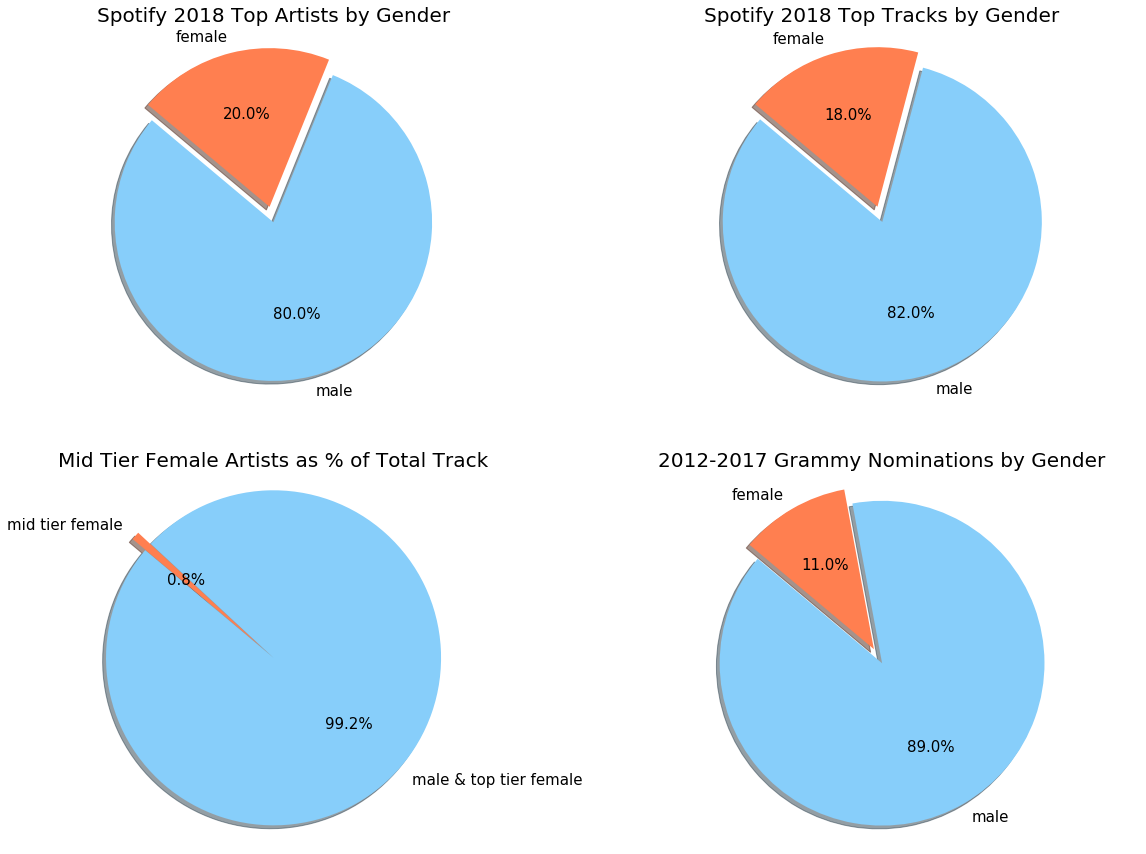

In [323]:
#two data frames below are from spotify
df_top2018=pd.DataFrame()
df_top2018['Number']=[40,10]
df_top2018['Gender']=['male','female']

df_toptracks=pd.DataFrame()
df_toptracks['Number']=[41,9]
df_toptracks['Gender']=['male','female']

#define midtier artists
df_midtier=pd.DataFrame()
df_midtier['Number']=[992,8]
df_midtier['Gender']=['male & top tier female','mid tier female']

#this data frame is from a study by Annenberg Inclusion Initiative 
df_grammies=pd.DataFrame()
df_grammies['Number']=[471,58]
df_grammies['Gender']=['male','female']

plt.rcParams['font.size'] = 15

dfs=[df_top2018, df_toptracks, df_midtier,df_grammies]
fig = plt.figure()
fig.set_size_inches(20,15)
titles=['Spotify 2018 Top Artists by Gender','Spotify 2018 Top Tracks by Gender','Mid Tier Female Artists as % of Total Track' , '2012-2017 Grammy Nominations by Gender']
i=1
while i <5:
    plt.subplot(2, 2,i)
    df=dfs[i-1]
    labels = df['Gender'] 
    sizes = df['Number']
    colors = [ 'lightskyblue', 'coral']
    explode = (0.1, 0)  
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(titles[i-1], fontsize=20)
    i=i+1


In [85]:
#get all the tracks from all the playlists that the user has
top_tracks='37i9dQZF1DX1HUbZS4LEyL?si=gIlUIs2LQyiCJ3j4kAUdZQ'
username=sarahid
playlist = sp.user_playlist(username,top_tracks)
print()
print(playlist['name'])   
print('  total tracks', playlist['tracks']['total'])
results = sp.user_playlist(username, playlist['id'], fields="tracks,next")
            
tracks = results['tracks']
show_tracks(tracks)
while tracks['next']:
    tracks = sp.next(tracks)
    show_tracks(tracks)


Top Tracks of 2018
  total tracks 100
   0                            Drake God's Plan
   1                     XXXTENTACION SAD!
   2                      Post Malone rockstar (feat. 21 Savage)
   3                      Post Malone Psycho (feat. Ty Dolla $ign)
   4                            Drake In My Feelings
   5                      Post Malone Better Now
   6                          Cardi B I Like It
   7                    Calvin Harris One Kiss (with Dua Lipa)
   8                         Dua Lipa IDGAF
   9                       Marshmello FRIENDS
   10                   Camila Cabello Havana
   11                       Juice WRLD Lucid Dreams
   12                            Drake Nice For What
   13                         Maroon 5 Girls Like You (feat. Cardi B)
   14                             Zedd The Middle
   15                   Kendrick Lamar All The Stars (with SZA)
   16                    Ariana Grande no tears left to cry
   17                        Nicky Jam 

In [354]:
#here we will download our data into data frame format

# Filenames for h5 data files
fname_data = 'data/data.h5'
fname_entry = 'data/playlist_entry 2.h5'
fname_pairs = 'data/track_pairs.h5'

# Start timer
t0 = time.time()

# Load the dataframes for Artist, Album, Track, and Playlist
df_artist = pd.read_hdf(fname_data, 'Artist')
df_album = pd.read_hdf(fname_data, 'Album')
df_track = pd.read_hdf(fname_data, 'Track')
df_playlist = pd.read_hdf(fname_data, 'Playlist')
df_playlist_last10 = pd.read_hdf(fname_data, 'Playlist_Last10')

# Load the big dataframe for PlaylistEntry
df_playlist_entry = pd.read_hdf(fname_entry, 'PlaylistEntry')

# Load the dataframes for audio features: AudioFeatures, Genre, MetaGenre, TrackGenre, TrackMetaGenre
df_audio_features = pd.read_hdf(fname_data, 'AudioFeatures')
df_genre = pd.read_hdf(fname_data, 'Genre')
df_meta_genre = pd.read_hdf(fname_data, 'MetaGenre')
df_track_genre = pd.read_hdf(fname_data, 'TrackGenre')
df_track_meta_genre = pd.read_hdf(fname_data, 'TrackMetaGenre')

# Load the big dataframe for TrackPairs
df_track_pairs = pd.read_hdf(fname_pairs, 'TrackPairs')

# Status update
t1 = time.time()
elapsed = t1 - t0
print(f'Loaded 10 Data Frames:')
print(f'Artist, Album, Track Playlist, PlaylistEnry, AudioFeatures, Genre, MetaGenre, TrackGenre, TrackMetaGenre.')  
print(f'Elapsed Time: {elapsed:0.2f} seconds.')


def demo_dataframes(dataframes, df_names):
    
    for i, df in enumerate(dataframes):
        df_name = df_names[i]
        print(f'\n***** {df_name}: First 20 Rows *****')
        display(df.head(20))

# Dataframes to be printed to screen (top 20 rows only)
dataframes = [df_artist, df_album, df_playlist, df_playlist_entry,df_audio_features,df_genre]
df_names = ['Artist', 'Album', 'Playlist', 'Playlist_Entry', 'Audio_Features', 'Genre']
# Demo dataframes
print('')
demo_dataframes(dataframes, df_names)



Loaded 10 Data Frames:
Artist, Album, Track Playlist, PlaylistEnry, AudioFeatures, Genre, MetaGenre, TrackGenre, TrackMetaGenre.
Elapsed Time: 97.45 seconds.


***** Artist: First 20 Rows *****


,ArtistID,ArtistUri,ArtistName
0,1,spotify:artist:0001cekkfdEBoMlwVQvpLg,Jordan Colle
1,2,spotify:artist:0001wHqxbF2YYRQxGdbyER,Motion Drive
2,3,spotify:artist:0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi
3,4,spotify:artist:0004C5XZIKZyd2RWvP4sOq,"""Faron Young, Nat Stuckey"""
4,5,spotify:artist:000DnGPNOsxvqb2YEHBePR,The Ruins
5,6,spotify:artist:000Dq0VqTZpxOP6jQMscVL,Thug Brothers
6,7,spotify:artist:000h2XLY65iWC9u5zgcL1M,Kosmose
7,8,spotify:artist:000spuc3oKgwYmfg5IE26s,Parliament Syndicate
8,9,spotify:artist:000UUAlAdQqkTD9sfoyQGf,Darren Gibson
9,10,spotify:artist:000UxvYLQuybj6iVRRCAw1,Primera Etica



***** Album: First 20 Rows *****


,AlbumID,AlbumUri,AlbumName
0,1,spotify:album:00010fh2pSk7f1mGIhgorB,Okkadu (Original Motion Picture Soundtrack)
1,2,spotify:album:00045VFusrXwCSietfmspc,Let Love Begin Remixed
2,3,spotify:album:0005lpYtyKk9B3e0mWjdem,Stability
3,4,spotify:album:0005rH90S3le891y5XzPg4,"Mozart: Piano Concerto No. 27, KV595"
4,5,spotify:album:0008WZMLnvEBVnq418uZsI,Smart Flesh
5,6,spotify:album:0009lq7uJ6cW3Cxtf8eNUp,Earth: The Pale Blue Dot (Instrumental)
6,7,spotify:album:000aG92zPFtZ0FRLaaJHE5,X
7,8,spotify:album:000f3dTtvpazVzv35NuZmn,"Make It Fast, Make It Slow"
8,9,spotify:album:000g9ysmwb8NNsd4u1o087,"Nennt es, wie Ihr wollt"
9,10,spotify:album:000gdWY9uR4VYS5oZudY5o,Pérez Prado. Sus 40 Grandes Canciones



***** Playlist: First 20 Rows *****


,PlaylistID,PlaylistName,NumTracks,NumArtists,NumFollowers,NumEdits,DurationMS,IsCollaborative,ModifiedAt
0,0,Throwbacks,52,37,1,6,11532414,0,1493424000
1,1,Awesome Playlist,39,21,1,5,11656470,0,1506556800
2,2,korean,64,31,1,18,14039958,0,1505692800
3,3,mat,126,86,1,4,28926058,0,1501027200
4,4,90s,17,16,2,7,4335282,0,1401667200
5,5,Wedding,80,56,1,3,19156557,0,1430956800
6,6,I Put A Spell On You,16,13,1,2,3408479,0,1477094400
7,7,2017,53,48,1,38,12674796,0,1509321600
8,8,BOP,46,23,2,21,9948921,0,1508976000
9,9,old country,21,18,1,10,4297488,0,1501804800



***** Playlist_Entry: First 20 Rows *****


,PlaylistID,Position,TrackID
0,0,0,236619
1,0,1,1866537
2,0,2,260403
3,0,3,347127
4,0,4,451364
5,0,5,270971
6,0,6,1784688
7,0,7,938244
8,0,8,2145897
9,0,9,776743



***** Audio_Features: First 20 Rows *****


,TrackID,TrackUri,TrackGid,TrackPopularityRank,NumArtists,Acousticness,BeatStrength,Bounciness,Danceability,Duration,...,Instrumentalness,KeySignature,Speechiness,Liveness,Loudness,Valence,Tempo,TimeSignature,Genres,MetaGenres
0,56,spotify:track:000xQL6tZNLJzIrtIgxqSl,000131d869a9433cb700156fae606cc9,1460,2,0.130732,0.558843,0.576541,0.747604,188.49084,...,1.340938e-07,7,0.064441,0.085159,-6.029,0.524294,120.963,4,"['pop', 'post-teen pop', 'dance pop']",['pop']
1,61,spotify:track:0010mZpCCwlPwoBiBsjoac,00023386195b4c76ab2a0be630d58260,229531,1,0.115593,0.297802,0.246247,0.529107,249.94667,...,3.295641e-06,3,0.035802,0.154760,-4.777,0.583609,125.001,3,"['indie rock', 'indie pop', 'new rave', 'alter...","['pop', 'edm', 'electronic', 'indie', 'rock']"
2,81,spotify:track:001BVhvaZTf2icV88rU3DA,000386d1712d46cbb1054b70c65e4312,180078,2,0.060971,0.686257,0.709951,0.774799,205.25569,...,1.372668e-02,6,0.157844,0.166061,-11.755,0.356076,87.997,4,[],[]
3,95,spotify:track:001m5KK2fu67yZ5ZW46LDZ,0002f7c8817b48a2877c0ec020e0affb,216710,1,0.000022,0.241777,0.221053,0.393347,194.32000,...,1.060433e-04,1,0.040000,0.375206,-3.705,0.500194,152.283,4,"['modern rock', 'pop punk', 'alternative emo']","['indie', 'punk', 'rock']"
4,112,spotify:track:001wUOgo8t9VElHl45bxzr,00035992fa19413e93d52d34c645a151,795321,1,0.073824,0.625201,0.686237,0.769578,217.96000,...,5.134304e-12,2,0.350177,0.121472,-3.241,0.516250,94.502,4,"['boy band', 'funk', 'rap', 'r&b', 'urban cont...","['soul', 'r&b', 'hiphop', 'pop']"
5,150,spotify:track:002KbOVOX22zbNDwwnA0Wi,000601aea98545fab490c3b1bcc459ee,778721,1,0.101869,0.686194,0.706870,0.732072,210.00000,...,7.475746e-01,5,0.048312,0.055091,-4.172,0.683759,127.984,4,"['edm', 'melbourne bounce', 'pop', 'tropical h...","['pop', 'edm']"
6,161,spotify:track:002opcRBgYV5jqoh72QcqA,00053cdc9a95411ab9ec21cda2681880,31392,1,0.050832,0.505873,0.591303,0.706987,181.95782,...,1.339225e-07,9,0.142412,0.101659,-7.154,0.260623,89.901,4,"['teen pop', 'pop', 'boy band', 'post-teen pop']",['pop']
7,164,spotify:track:002PgfoyfrOGiKch4EW8Wm,00062f80ae8249a286d934bb53dc84b2,745770,1,0.985388,0.190306,0.145943,0.198650,46.86667,...,6.275340e-01,8,0.045745,0.115261,-31.142,0.089051,68.167,4,"['hollywood', 'disney', 'soundtrack', 'movie t...",['soundtrack']
8,238,spotify:track:003U4oQXv82GYo1tNquN2F,00088b1ffc4b4ace9cf088c7632197b9,52679,2,0.002161,0.343073,0.393943,0.537607,299.29410,...,1.652823e-01,7,0.102972,0.354716,-3.924,0.234581,170.035,4,"['edm', 'brostep', 'catstep', 'electro house',...",['edm']
9,295,spotify:track:004skCQeDn1iLntSom0rRr,0009c0ae6dcb4c49a6323ae27a2228bd,122142,1,0.000912,0.420659,0.383717,0.605575,177.77333,...,1.882367e-06,4,0.070218,0.054712,-4.465,0.768881,132.996,4,['post-teen pop'],['pop']



***** Genre: First 20 Rows *****


,GenreID,GenreName
0,1,21st century classical
1,2,a cappella
2,3,abstract
3,4,abstract beats
4,5,abstract hip hop
5,6,acid house
6,7,acid jazz
7,8,acid techno
8,9,acoustic blues
9,10,acoustic pop


In [138]:
summary_stats=pd.DataFrame(index=range(5),columns=range(0))
summary_stats.index=['Playlist entries:','Playlists:',"Albums:","Artists:","Genres:",]


In [132]:
num_play=(len(df_playlist))

In [133]:
num_art=(len(df_artist))

In [134]:
num_alb=( len(df_album))

In [135]:
num_genres=( len(df_genre))

In [123]:
#merge playlist df with playlist entry df
combined=df_playlist_entry.merge(df_playlist, how='left', left_on='PlaylistID', right_on='PlaylistID')

In [136]:
num_totplay=(len(combined))


In [139]:
summary_stats['count']=[num_totplay,num_play,num_alb,num_art,num_genres,]
display(summary_stats)

,count
Playlist entries:,66346428
Playlists:,1000000
Albums:,734684
Artists:,295860
Genres:,1161


As the table above demonstrates, we have a massive amount of data with 1 million playlists over 66 million of playlist entries to work with. This bodes well for model accuracy, although will present some data aggregation, processing and computational issues down the line. 

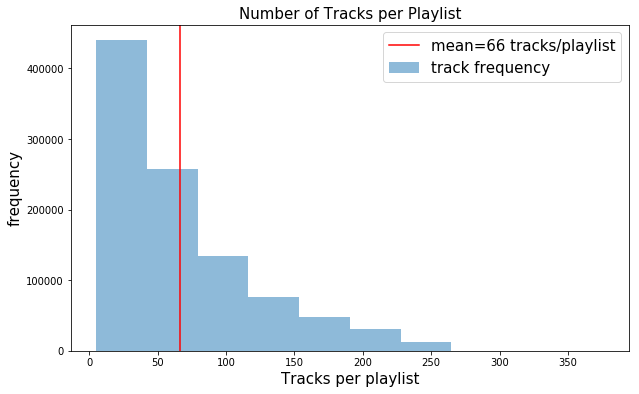

In [142]:
#plot distribution of tracks per playlist
plt.figure(figsize=(10,6))
plt.hist(df_playlist.NumTracks, label='track frequency', alpha=.5)
plt.title('Number of Tracks per Playlist', fontsize=15)
plt.xlabel('Tracks per playlist', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.axvline(x=np.mean(df_playlist.NumTracks), label='mean=66 tracks/playlist', color='red')
plt.legend(fontsize=15)

The distribution of tracks per playlist is severly right skewed.  For the purposes of our analysis we cut the entries with less than 20 tracks since our goal was to predict the next 10. That still left us with nearly 64 million playlist entries to work with.

In [143]:
over_20=df_playlist.loc[df_playlist['NumTracks'] >20]


In [144]:
print('Number of playlists with > >20 tracks:',np.sum(over_20.NumTracks))

Number of playlists with > >20 tracks: 63902765


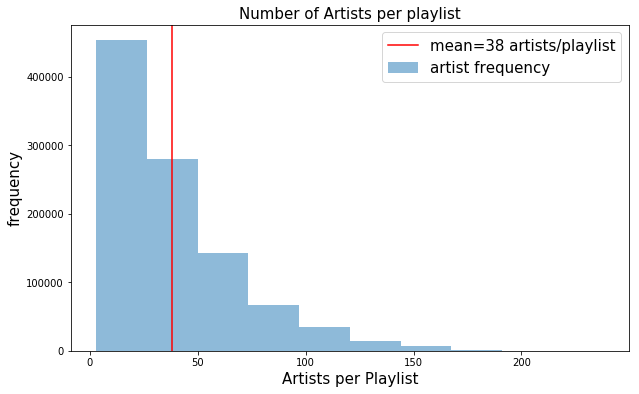

In [145]:
#plot distribution of artists per playlist
plt.figure(figsize=(10,6))
plt.hist(df_playlist.NumArtists,label='artist frequency', alpha=.5)
plt.title('Number of Artists per playlist',fontsize=15, )
plt.xlabel('Artists per Playlist', fontsize=15)
plt.axvline(x=np.mean(df_playlist.NumArtists), label='mean=38 artists/playlist', color='red')         
plt.ylabel('frequency', fontsize=15)
plt.legend(fontsize=15)

The distribution of artists per playlist is also very right skewed with the average user including 38 artists in their playlist. 

In [295]:
# counts unique entries
summary =combined.groupby('PlaylistName')['TrackID'].nunique()


In [296]:
summary=pd.DataFrame(summary)

In [161]:
#counts track frequency 
n=100
playlist_freq = combined.groupby(['PlaylistName'])['TrackID'].agg(
    {"track_count": len}).sort_values(
    "track_count", ascending=False).head(n).reset_index()


/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [162]:
combined_freq=pd.merge(playlist_freq,summary,how='left', left_on='PlaylistName', right_on='PlaylistName')

In [163]:
combined_freq['PerUnique']=combined_freq.TrackID/combined_freq.track_count

In [164]:
print('average proportion of unique tracks per playlist:',np.mean(combined_freq.PerUnique))

average proportion of unique tracks per playlist: 0.2705243798714222


In [288]:
df_unique=combined_freq.PerUnique[:30]

In [289]:
df_unique.index=list(x.lower() for x in combined_freq.PlaylistName[:30])
df_unique=df_unique[~df_unique.index.duplicated(keep='first')]
df_unique=df_unique.sort_values(ascending=False)
df_unique=df_unique.drop(['throwback'])

In [290]:
df_unique=pd.DataFrame(df_unique)
df_unique.columns=['percent unique']


In [291]:
names=(df_unique.index)
names = [name.replace('??????','unicode_name1*') for name in names]
names = [name.replace('????','unicode_name2*') for name in names]
names = [name.replace('??','unicode_name3*') for name in names]
df_unique.index=names

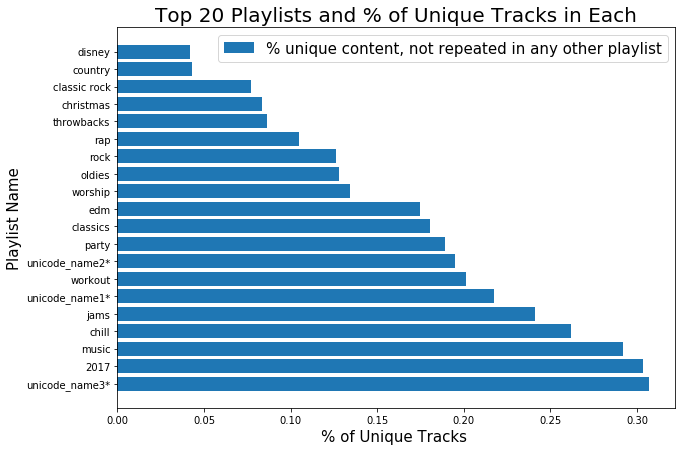

In [294]:
#plot unique tracks as % of total
plt.figure(figsize=(10,7))
plt.barh(df_unique.index,df_unique['percent unique'], label='% unique content, not repeated in any other playlist')
plt.title("Top 20 Playlists and % of Unique Tracks in Each", fontsize=20)
plt.xlabel('% of Unique Tracks ', fontsize=15)
plt.ylabel('Playlist Name', fontsize=15)
plt.legend(loc='best', fontsize=15)

*Playlists with uncrecognized unicode characters were renamed unicode_name1, unicode_name2 and so forth.

From the plot above we note that for the top 20 most popular playlists, less than 31% of all content is unique. What this means is that less than 31% of the tracks in these playlist are unique to just one playlist with 69% and more tracks repeated across playists with the same name.  For example, for playlists named country only 4% of the tracks appear just once and are not repeated across other users' playlists with the same name.  This discovery, was our motivation for building a playlist name based model (more on this in the model section of this report).

In [298]:
#group track names by frequency
n=1000000
df_top_freq = df_playlist.groupby(['PlaylistName'])['PlaylistName'].agg(
    {"name_count": len}).sort_values(
    "name_count", ascending=False).head(n).reset_index()

/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [299]:
print('top 2000 names are attributed to the following number of plylists:',np.sum(list(df_top_freq.name_count[:2000])))
print(df_top_freq.head())

top 2000 names are attributed to the following number of plylists: 537881
  PlaylistName  name_count
0         ????        6223
1      Country        5978
2    Christmas        5239
3        Chill        5184
4          Rap        4969


Text(0,0.5,'% of total playlists ')

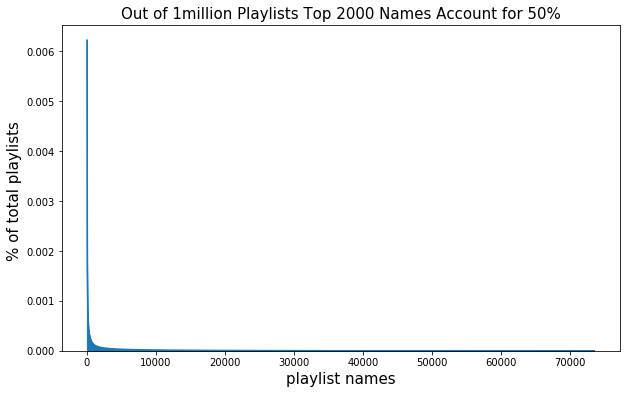

In [300]:
#plot track name frequency distribution
plt.figure(figsize=(10,6))
(df_top_freq.name_count/1000000).plot.area()
plt.title("Out of 1million Playlists Top 2000 Names Account for 50%", fontsize=15)
plt.xlabel('playlist names', fontsize=15)
plt.ylabel('% of total playlists ',fontsize=15)

Text(0,0.5,'CDF')

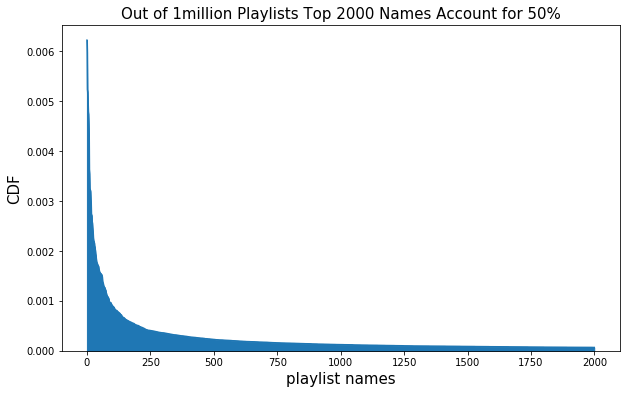

In [301]:
plt.figure(figsize=(10,6))
(df_top_freq.name_count[:2000]/1000000).plot.area()
plt.title("Out of 1million Playlists Top 2000 Names Account for 50%", fontsize=15)
plt.xlabel('playlist names', fontsize=15)
plt.ylabel('CDF' ,fontsize=15)

While Spotify offers plenty of opportunity for its users to create unique playlist names, most users end up picking the same playlists names as their peers. In fact, out of 1 million playlist, half are described with just 2000 names (i.e. a lot of repetition).The table above shows top 5 playlist names.

In [302]:
#calculate top frequency tracks
n=2000
df_top_freq_track = df_playlist_entry.groupby(['TrackID'])['TrackID'].agg(
    {"name_count": len}).sort_values(
    "name_count", ascending=False).head(n).reset_index()

/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [303]:
#total=len(df_playlist_entry)

In [136]:
#plt.figure(figsize=(10,6))
#plt.plot( df_top_freq_track.name_count/total)
#plt.title("Out of 6.6million Playlist Entries, Top 2000 Account for 30%", fontsize=15)
#plt.xlabel('track', fontsize=15)
#plt.ylabel('% of total playlist entries',fontsize=15)

In [137]:
#print(total)
#total_pop=np.sum(list((df_top_freq_track.name_count[:2000]/total)))
#print("total top 250 tracks as % of total playlists:", total_pop)

In [304]:
track1=pd.DataFrame(df_track_pairs.TrackID_1)
len(track1)
track2=pd.DataFrame(df_track_pairs.TrackID_2)
print("total number of track pairs:",len(track1))

total number of track pairs: 152641516


In [312]:
# we will take a random sample of 1million pairs
sample=np.random.choice(range(len(track1)),100000)
sample_pairs=df_track_pairs.iloc[sample]
sample_pairs_sorted=sample_pairs.sort_values("Frequency", ascending=False)

In [327]:
#sort our pairs by the highest frequency
sample_pairs_sorted = sample_pairs_sorted[sample_pairs_sorted['TrackID_1'] != sample_pairs_sorted['TrackID_2']]
display(sample_pairs_sorted.head())

,TrackID_1,TrackID_2,Frequency
140865472,1636952,1889327,4020
125764954,1306426,1955905,3538
135940235,1534119,1628340,3398
84186656,753781,1845169,3272
70357875,612176,687930,3216


In [336]:
track_ids=list(sample_pairs_sorted['TrackID_1'])

In [338]:
#prepare top 4 pairs for scatter plot
one_track=sample_pairs_sorted.loc[sample_pairs_sorted['TrackID_1'] == track_ids[0]]
two_track=sample_pairs_sorted.loc[sample_pairs_sorted['TrackID_1'] == track_ids[1]]
three_track=sample_pairs_sorted.loc[sample_pairs_sorted['TrackID_1'] == track_ids[2]]
four_track=sample_pairs_sorted.loc[sample_pairs_sorted['TrackID_1'] == track_ids[3]]


Text(0.5,1,'Probability of Track 2 Given Track 1 : P(Track2| Track1= x)')

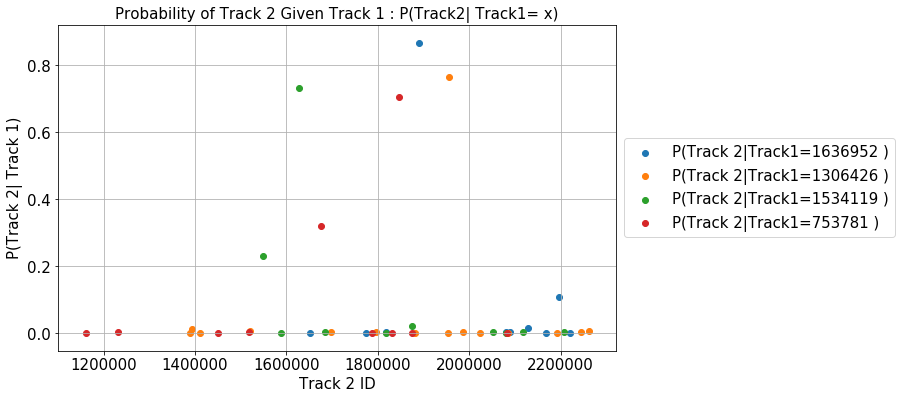

In [346]:
plt.figure(figsize=(10,6))
plt.scatter(one_track.TrackID_2, one_track.Frequency/(np.sum(list(three_track.Frequency))), label=f'P(Track 2|Track1={track_ids[0]} )')
plt.scatter(two_track.TrackID_2, two_track.Frequency/(np.sum(list(three_track.Frequency))),label=f'P(Track 2|Track1={track_ids[1]} )' )
plt.scatter(three_track.TrackID_2, three_track.Frequency/(np.sum(list(three_track.Frequency))), label=f'P(Track 2|Track1={track_ids[2]} )')
plt.scatter(four_track.TrackID_2, four_track.Frequency/(np.sum(list(three_track.Frequency))),label=f'P(Track 2|Track1={track_ids[3]} )' )
plt.xlabel('Track 2 ID', fontsize=15)
plt.ylabel('P(Track 2| Track 1)', fontsize=15)
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.title('Probability of Track 2 Given Track 1 : P(Track2| Track1= x)', fontsize= 15)

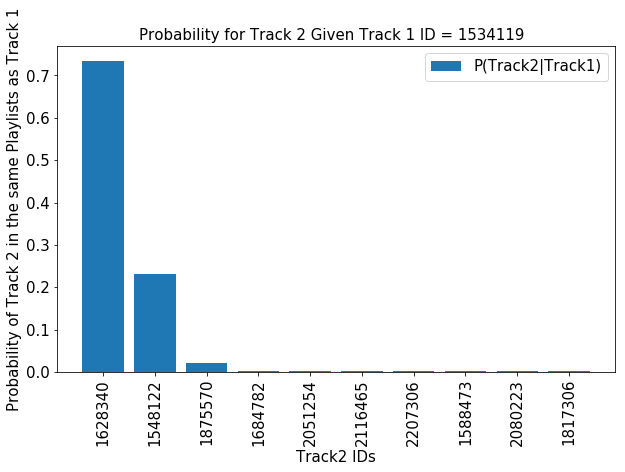

In [347]:
plt.figure(figsize=(10,6))
plt.bar(three_track.TrackID_2.astype('str'),three_track.Frequency/(np.sum(list(three_track.Frequency))), label='P(Track2|Track1)')
plt.xticks( rotation='vertical')
plt.xlabel('Track2 IDs', fontsize=15)
plt.ylabel('Probability of Track 2 in the same Playlists as Track 1', fontsize=15)
plt.title(f'Probability for Track 2 Given Track 1 ID = {track_ids[2]}  ', fontsize=15)
plt.legend()

From the visualizations above we note that knowing one of the tracks in the playlist can provide valuable information about the probability of another track being in the same playlist. This was the inspiration behind our Naive Bayes Track Pairs model.

### Data Acquisition & Import:


### Sharing our Data for Replicable Science
The primary data source in this project was the **Million Playlist Dataset** provided by Spotify as part of the RecSys Challenge 2018.
https://labs.spotify.com/2018/05/30/introducing-the-million-playlist-dataset-and-recsys-challenge-2018/
The challenge ended on June 30th of 2018, so we used an archival copy of the dataset provided to us by the course staff.
All source code for this project is on a public GitHub Respository 
https://github.com/IACS-CS-209-Group44/Spotify

Unfortunately, Git and GitHub are not well suited to working on large files, especially large binary files.
Because of the large size of this data set, we were forced to use a shared folder on Dropbox to share large files.
This makes it more challenging for us to share our data with the public and create a conveniently reproducible set of calculations.  We are committed to the goal of fully reproducible science including data science with large files.
For a full scale research undertaking with a suitable budget, two ideas to better achieve this goal would be to host a publicly available database instance using a service like AWS and / or to share a container instance.  These techniques are beyond the scope of this project.  

The data on our Dropbox includes several formats that make it easy to replicate almost all of our work.  The h5 data files allow all of our imported data and results of calculations into Pandas dataframes.  There is also a database backup available in the file `SpotifyDB.bak`.  Warning: this is a bit of a monster, weighing in at **165 GB**, so it's not for the faint of heart.  Someone with access to a moderately powerful SQL Server instance, either on-premises or on the cloud, can restore this database from the backup file.
Anyone who is interested in accessing our dataset may email me at mse99@g.harvard.edu or michael.s.emanuel@gmail.com to request access to this dataset.  Any reasonable request will be granted read only access to the shared folder on Dropbox for as long as it is up.

### The JSON Data Set and the Choice of SQL Server Backend
The data provided by the mpd consists of 1000 json files.  Each file is a "slice" of 1,000 playlists.  There are 1,000 of these slice files that together comprise the 1,000,000 playlists in the data set.  The JSON files are a highly denormalized representation of the data, meaning they have a large amount of duplicated or redundant data.  As one prominent example, each spotify track has a unique identifier, and a track name associated with this identifier.  The JSON files duplicate the full track name when describing each track entry.  We stored the data in a fully normalized format, with separate database tables for the logical entities of a Track, Playlist, PlaylistEntry, etc.  I will describe our data model in greater detail below.  

The choice to use SQL Server as our back end for data was an important strategic decision on this project.  
The JSON respresentation of the data is convenient for a person reviewing the data, but is extremely inefficient for doing large scale computations.  As one example of how slow the JSON / Python API is, the data set comes with some Python utilities that do very simple summary calculations such as tabulating the most popular tracks.  This utility was on pace to take over 90 minutes to run on my desktop PC, which has top of the line hardware for a desktop computer.

It was clear that we needed a far more efficient back end for storing our data in a more normalized form.  Most people in this course would probably have chosen to use Pandas and persisted a series of data frames.  That is a completely sound choice.  In my particular case, I have spent many years working with SQL (first MySQL, then SQL Server).  I have also invested a large amount of time and money configuring an instance of SQL Server running on a high performance server sitting on a rack in my basement.  By comparison, I am very new to Pandas.  I'm now proficient for basic tasks, but I have often spent hours trying to figure out how to do an operation I could do in a matter of minutes in SQL Server.  It is often true that the best tool for a given job is the one you know how to use.  For me and this problem, that tool was SQL Server.

### Data Import into SQL Server
The first step was to understand the data and break it up into logical entities.  Each logical entity corresponds to its own database table.  The four most important logical entities in this data set are Artist, Album, Track, and Playlist.  I am going to go out of order for a moment and jump ahead to the Pandas dataframes that we used for downstream computations.  The code below loads these frames from an h5 data file.  

Before this code will run, please copy the files `data.h5` and `playlist_entry.h5` from the Dropbox folder to the directory where you cloned the GitHub repo.  On my system, the repo is cloned to `D:\IACS-CS-209-Spotify\` and the Dropbox folder is at `D:\Dropbox\IACS-CS-209-Spotify\`.  I copy the file `D:\Dropbox\IACS-CS-209-Spotify\mpd\database_export\h5` into `D:\IACS-CS-209-Spotify\data\data.h5`.  I do the analogous operation for files `playlist_entry.h5` and `track_pair.h5`.

It is possible to automate all of this in a very slick and convenient way using GitHub LFS.  https://git-lfs.github.com/
But this is a paid service that costs at least \$10 a month, possibly quite a bit more given the size of this data set.  I spent several hours investigating alternatives that would allow us to bypass this manual copy step to synchronize the Dropbox folder, but did not come up with a better procedure.  Once the file `data.h5` is in place, the code below will load the data frames for Artist, Album, Track, and Playlist into memory.

In [2]:
def load_frames(frame_names: Optional[List[str]] = None) -> Dict[str, pd.DataFrame]:
    """Load all available data frames.  Return a dictionary keyed by frame_name."""
    # Relative path to h5 data files
    path_h5 = '../data/'
    
    # Dictionary of dataframes to be generated.
    # Key = frame name, value = fname_h5
    frame_tbl: Dict[str, str] = {
        # Basic schema
        'Artist': 'data.h5',
        'Album': 'data.h5',
        'Track': 'data.h5',
        'Playlist': 'data.h5',
    
        # Tables relating to prediction outcomes and scoring
        'TrainTestSplit': 'data.h5',
        'Playlist_Last10': 'data.h5',
        'Playlist_trn': 'data.h5',
        'Playlist_tst': 'data.h5',
        
        # Tables relating to the baseline and playlist name prediction models
        'TrackRank': 'data.h5',
        'PlaylistName': 'data.h5',
        'PlaylistSimpleName': 'data.h5',
        'TrackRankBySimpleName': 'data.h5',
    
        # PlaylistEntry table is big - saved int its own file
        'PlaylistEntry': 'playlist_entry.h5',
    
        # Audio features
        'AudioFeatures': 'data.h5',
        'Genre': 'data.h5',
        'MetaGenre': 'data.h5',
        'TrackGenre': 'data.h5',
        'TrackMetaGenre': 'data.h5',
        
        # TrackPairs table is big - saved in its own file
        'TrackPairs': 'track_pairs.h5',
        
        # Scores of three models: baseline, playlist name, naive bayes
        'Scores_Baseline': 'data.h5',
        'Scores_SimpleName': 'data.h5',
        'Scores_TrackPair': 'data.h5',
        'Scores_Stack': 'data.h5',
        
        # Survey responses
        'SurveyResponse': 'data.h5',
        'SurveyPlaylist': 'data.h5',
        'SurveyPlaylistEntry': 'data.h5',

        # Artists being promoted by policy (mid-tier, female)
        'PromotedArtist': 'data.h5',

        # Survey recommendations
        'SurveyRecommendations': 'data.h5',
        'SurveyRecommendationsPromoted': 'data.h5',
        }
    
    # Set frame_names to all tables if it was not specified
    if frame_names is None:
        frame_names = frame_tbl.keys()
    
    # Start timer
    t0 = time.time()
    # Dictionary of data frames
    frames: Dict[str, pd.DataFrame] = dict()
    # Iterate over entries in frame_names, loading them from h5 files
    for frame_name in frame_names:
        # h5 filename for this frame
        fname_h5 = frame_tbl[frame_name]
        # Read the data frame
        frames[frame_name] = pd.read_hdf(path_h5 + fname_h5, frame_name)
        # Status update
        print(f'Loaded {frame_name}.')
    
    # Status update
    t1 = time.time()
    elapsed = t1 - t0
    print(f'\nLoaded {len(frames)} Data Frames.')
    print(f'Elapsed Time: {elapsed:0.2f} seconds.')
    return frames

**Load the frames for Artist, Album, Track, Playlist & PlaylistEntry into memory**

In [9]:
frames = load_frames(['Artist', 'Album', 'Track', 'Playlist', 'PlaylistEntry'])

Loaded Artist.
Loaded Album.
Loaded Track.
Loaded Playlist.
Loaded PlaylistEntry.

Loaded 5 Data Frames.
Elapsed Time: 4.72 seconds.


Notice how much faster and more efficient this is than loading the JSON files.  An analogous operation run directly on the JSON files took on the order of multiple minutes on my system.  The size of the decompressed JSON files was approximately 32 GB.  The size of the normalized tables storing the exact same information was approximately 2 GB.  Normalizing the data compressed it by a factor of 16.  (Try doing that with a ZIP file compression!)

It is said that a picture is worth a thousand words.  The same is often true of an example.  Please see below examples of the first 10 records on the five key tables in the data set: Artist, Album, Track, Playlist, and PlaylistEntry.

### Data Model for Artist, Album, Track, Playlist  & PlaylistEntry

In [4]:
display(frames['Artist'].head(10))

,ArtistID,ArtistUri,ArtistName
0,1,spotify:artist:0001cekkfdEBoMlwVQvpLg,Jordan Colle
1,2,spotify:artist:0001wHqxbF2YYRQxGdbyER,Motion Drive
2,3,spotify:artist:0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi
3,4,spotify:artist:0004C5XZIKZyd2RWvP4sOq,"""Faron Young, Nat Stuckey"""
4,5,spotify:artist:000DnGPNOsxvqb2YEHBePR,The Ruins
5,6,spotify:artist:000Dq0VqTZpxOP6jQMscVL,Thug Brothers
6,7,spotify:artist:000h2XLY65iWC9u5zgcL1M,Kosmose
7,8,spotify:artist:000spuc3oKgwYmfg5IE26s,Parliament Syndicate
8,9,spotify:artist:000UUAlAdQqkTD9sfoyQGf,Darren Gibson
9,10,spotify:artist:000UxvYLQuybj6iVRRCAw1,Primera Etica


In [5]:
display(frames['Album'].head(10))

,AlbumID,AlbumUri,AlbumName
0,1,spotify:album:00010fh2pSk7f1mGIhgorB,Okkadu (Original Motion Picture Soundtrack)
1,2,spotify:album:00045VFusrXwCSietfmspc,Let Love Begin Remixed
2,3,spotify:album:0005lpYtyKk9B3e0mWjdem,Stability
3,4,spotify:album:0005rH90S3le891y5XzPg4,"Mozart: Piano Concerto No. 27, KV595"
4,5,spotify:album:0008WZMLnvEBVnq418uZsI,Smart Flesh
5,6,spotify:album:0009lq7uJ6cW3Cxtf8eNUp,Earth: The Pale Blue Dot (Instrumental)
6,7,spotify:album:000aG92zPFtZ0FRLaaJHE5,X
7,8,spotify:album:000f3dTtvpazVzv35NuZmn,"Make It Fast, Make It Slow"
8,9,spotify:album:000g9ysmwb8NNsd4u1o087,"Nennt es, wie Ihr wollt"
9,10,spotify:album:000gdWY9uR4VYS5oZudY5o,Pérez Prado. Sus 40 Grandes Canciones


In [16]:
display(frames['Track'].head(10))

,TrackID,ArtistID,AlbumID,TrackUri,TrackName
0,1,208716,355266,spotify:track:0000uJA4xCdxThagdLkkLR,Heart As Cold As Stone
1,2,110598,6666,spotify:track:0002yNGLtYSYtc0X6ZnFvp,Muskrat Ramble
2,3,93681,77525,spotify:track:00039MgrmLoIzSpuYKurn9,Thas What I Do
3,4,5377,586855,spotify:track:0003Z98F6hUq7XxqSRM87H,???? ?????? ??? ???
4,5,285766,426742,spotify:track:0004ExljAge0P5XWn1LXmW,Gita
5,6,240510,337666,spotify:track:0005rgjsSeVLp1cze57jIN,Mi Razón de Ser
6,7,111429,625930,spotify:track:0005w1bMJ7QAMl6DY98oxa,"Sonata in G Major, BuxWV 271: Allegro -"
7,8,102394,113691,spotify:track:0006Rv1e2Xfh6QooyKJqKS,Nightwood
8,9,240180,287678,spotify:track:0007AYhg2UQbEm88mxu7js,Mandarin Oranges Part 2
9,10,35528,570255,spotify:track:0009mEWM7HILVo4VZYtqwc,Movement


In [17]:
display(frames['Playlist'].head(10))

,PlaylistID,PlaylistName,NumTracks,NumArtists,NumFollowers,NumEdits,DurationMS,IsCollaborative,ModifiedAt
0,0,Throwbacks,52,37,1,6,11532414,0,1493424000
1,1,Awesome Playlist,39,21,1,5,11656470,0,1506556800
2,2,korean,64,31,1,18,14039958,0,1505692800
3,3,mat,126,86,1,4,28926058,0,1501027200
4,4,90s,17,16,2,7,4335282,0,1401667200
5,5,Wedding,80,56,1,3,19156557,0,1430956800
6,6,I Put A Spell On You,16,13,1,2,3408479,0,1477094400
7,7,2017,53,48,1,38,12674796,0,1509321600
8,8,BOP,46,23,2,21,9948921,0,1508976000
9,9,old country,21,18,1,10,4297488,0,1501804800


In [18]:
display(frames['PlaylistEntry'].head(10))

,PlaylistID,Position,TrackID
0,0,0,236619
1,0,1,1866537
2,0,2,260403
3,0,3,347127
4,0,4,451364
5,0,5,270971
6,0,6,1784688
7,0,7,938244
8,0,8,2145897
9,0,9,776743


#### Comments on the Table Design
The design of these database tables follows a few simple best practices.  All tables have an integer ID as their primary key.  This gives a large boost to the performance of queries that join tables.  Searching for an integer entry in an index is a much faster operation than comparings strings.  The original JSON data model did not have any integer IDs for any of these entities besides for the playlist ID.  All entities that exist in Spotify also have a field that Spotify names a Uri.  These are string identefiers.  These fields are equipped with unique constraints, building in both a data integrity check and causing SQL server to build indexes that both enforce the constraint and support fast joins on these fields.

The Track table demonstrates foreign key relationships.  The fields ArtistID and AlbumID are foreign keys onto the Artist and Album tables, respectively.  Note that no redundant information such as the ArtistName or ArtistUri are stored in the Track table.  Any consumer of this information is expected to get it by joining the Artist table using ArtistID.  The foreign key relationships are enforeced with foreign key constraints.  The primary key on the Track table is TrackID, and there is a separate unique constraint on the TrackUri.

This table also demonstrates a consistent naming scheme followed in the SpotifyDB database.  The name of the integer primary key on the table Artist is ArtistID.  This is one popular approach.  Another approach is to name the field ID.  I prefer to name the field ArtistID because then when you join from the Track table to the Artist table, the join clause uses the field AristID on both sides of the equality.  There are multiple naming approaches that are strong.  As is often the case, the most important thing is to pick one strategy and then follow it consistently.

For all you SQL aficianados out there, below please find the SQL table definitions for the main logical entities comprising the MPD dataset.  (Don't worry, I won't include all 42 tables in the database, just a few of the important ones!).  The entirety of the SQL used in this project can be found in the `sql` directory under the GitHub repo.  The files are named with a numeric prefix, so that tables are built in the correct order.  As an example, the Track table references the Artist and Album tables, so Artist and Album must be created first.  The relevant SQL scripts are named `03_MakeTable_Artist.sql`,  `04_MakeTable_Album.sql`, and `05_MakeTable_Track.sql`.

#### SQL Table Definitions for Main Logical Entities

**Artist** / Script `03_MakeTable_Artist.sql`

```mysql
DROP sequence IF EXISTS dbo.SEQ_ArtistID
CREATE sequence dbo.SEQ_ArtistID
  AS INT start WITH 1 increment BY 1 NO cycle;
  
DROP TABLE IF EXISTS dbo.Artist;
CREATE TABLE dbo.Artist(
ArtistID INT NOT NULL
  DEFAULT next value FOR dbo.SEQ_ArtistID,
ArtistUri CHAR(37) NOT NULL,
ArtistName VARCHAR(512) NOT NULL,
-- Primary Key and Unique constraints
CONSTRAINT PK_Artist_ArtistID PRIMARY KEY (ArtistID),
CONSTRAINT UNQ_Artist_ArtistUri UNIQUE(ArtistUri),
-- ArtistName should be unique, but unfortunately it's not; index it instead
INDEX IDX_Artist_ArtistName (ArtistName),
);
```

**Album** / Script `04_MakeTable_Album.sql`

```mysql
DROP sequence IF EXISTS dbo.SEQ_AlbumID
CREATE sequence dbo.SEQ_AlbumID
  AS INT start WITH 1 increment BY 1 NO cycle;
  
DROP TABLE IF EXISTS dbo.Album;
CREATE TABLE dbo.Album(
AlbumID INT NOT NULL
  DEFAULT next value FOR dbo.SEQ_AlbumID,
AlbumUri CHAR(36) NOT NULL,
AlbumName VARCHAR(512) NOT NULL,
-- Primary Key and Unique constraints
CONSTRAINT PK_Album_AlbumID PRIMARY KEY (AlbumID),
CONSTRAINT UNQ_Album_AlbumUri UNIQUE(AlbumUri),
-- AlbumName should be unique, but unfortunately it's not; index it instead
INDEX IDX_Album_AlbumName (AlbumName),
);
```

**Track** / Script `05_MakeTable_Track.sql`

```mysql
DROP sequence IF EXISTS dbo.SEQ_TrackID
CREATE sequence dbo.SEQ_TrackID
  AS INT start WITH 1 increment BY 1 NO cycle;
  
DROP TABLE IF EXISTS dbo.Track;
CREATE TABLE dbo.Track(
TrackID INT NOT NULL
  DEFAULT next value FOR dbo.SEQ_TrackID,
ArtistID INT NOT NULL,
AlbumID INT NOT NULL,
TrackUri CHAR(36) NOT NULL,
TrackName VARCHAR(512) NOT NULL,
-- Primary Key and Unique constraints
CONSTRAINT PK_Track_TrackID PRIMARY KEY (TrackID),
CONSTRAINT UNQ_Track_TrackUri UNIQUE(TrackUri),
-- TrackName should be unique, but unfortunately it's not; index it instead
INDEX IDX_Track_TrackName (TrackName),
-- Foreign keys on ArtistID and AlbumID
CONSTRAINT FK_Track_ArtistID FOREIGN KEY (ArtistID) 
  REFERENCES dbo.Artist(ArtistID),
CONSTRAINT FK_Track_AlbumID FOREIGN KEY (AlbumID) 
  REFERENCES dbo.Album(AlbumID)
);
```

**Playlist** / Script `06_MakeTable_Playlist.sql`

```mysql
CREATE TABLE dbo.Playlist(
PlaylistID INT NOT NULL,
PlaylistName varchar(100) NOT NULL,
-- Playlist attributes
NumTracks SMALLINT NOT NULL,
NumArtists SMALLINT NOT NULL,
NumFollowers INT NOT NULL,
NumEdits SMALLINT NOT NULL,
DurationMS INT NOT NULL,
IsCollaborative BIT NOT NULL,
ModifiedAt INT NOT NULL,
-- Primary key
CONSTRAINT PK_Playlist_PlaylistID PRIMARY KEY (PlaylistID),
-- Indices
INDEX IDX_Playlist_PlaylistName (PlaylistName),
INDEX IDX_Playlist_NumFollowers(NumFollowers),
);
```

**PlaylistEntry** / Script `07_MakeTable_PlaylistEntry.sql`

```mysql
CREATE TABLE dbo.PlaylistEntry(
PlaylistID INT NOT NULL,
Position SMALLINT NOT NULL,
TrackID INT NOT NULL,
-- Primary key is the pair of the PlaylistID and Position
CONSTRAINT PK_PlaylistEntry PRIMARY KEY (PlaylistID, Position),
-- Foreign keys
CONSTRAINT FK_PlaylistEntry_PlaylistID
  FOREIGN KEY (PlaylistID) REFERENCES dbo.Playlist(PlaylistID),
CONSTRAINT FK_PlaylistEntry_TrackID
  FOREIGN KEY (TrackID) REFERENCES dbo.Track(TrackID),
);
```

### Importing the Raw Data into SQL Server

These empty tables are very nice and clean, but they don't look anything like the quite bloated JSON files.  How were they populated?  I used a two step process.  In the first step, I populated "raw" tables for Playlist and PlaylistEntry that followed the structure of the JSON file contents much more closely.  These are the definitions of the raw tables; they have the same table names as their sister tables in the main database, but are stored in a different schema `r` (for raw) rather than the gnomically named schema `dbo` which is the default schema in SQL Server, and short for DataBaseOwner. 

**Raw Table r.Playlist** / Script `01_MakeTable_r_Playlist`
```mysql
CREATE TABLE r.Playlist(
PlaylistID INT NOT NULL,
PlaylistName VARCHAR(1024) NOT NULL,
-- The number of tracks, albums, and artists on this playlist
NumTracks SMALLINT NOT NULL,
NumAlbums SMALLINT NOT NULL,
NumArtists SMALLINT NOT NULL,
-- Additional information about the playlist
NumFollowers INT NOT NULL,
NumEdits SMALLINT NOT NULL,
DurationMS INT NOT NULL,
IsCollaborative BIT NOT NULL,
ModifiedAt INT NOT NULL,
-- Primary Key and indices
CONSTRAINT PK_r_Playlist_PlaylistID PRIMARY KEY (PlaylistID),
INDEX IDX_r_Playlist_PlaylistName (PlaylistName)
)
```

**Raw Table r.PlaylistEntry** / Script `02_MakeTable_r_PlaylistEntry`
```
CREATE TABLE r.PlaylistEntry(
PlaylistID INT NOT NULL,
Position SMALLINT NOT NULL,
-- The track
TrackUri VARCHAR(256) NOT NULL,
TrackName VARCHAR(1024) NOT NULL,
-- The album
AlbumUri VARCHAR(256) NOT NULL,
AlbumName VARCHAR(1024) NOT NULL,
-- The artist
ArtistUri VARCHAR(256) NOT NULL,
ArtistName VARCHAR(1024) NOT NULL,
-- Additional track info
TrackDurationMS INT NOT null
-- Primary Key and indices
CONSTRAINT PK_r_PlaylistEntry PRIMARY KEY (PlaylistID, Position),
INDEX IDX_r_PlaylistEntry_Tracks (TrackUri, TrackName),
INDEX IDX_r_PlaylistEntry_Albums (AlbumUri, AlbumName),
INDEX idx_r_PlaylistEntry_Artists (ArtistUri, ArtistName)
)
```

The cells below present the contents of the file `src/db_import.py`.  This program was run from the terminal and it populated the two raw tables **r.Playlist** and **r.PlaylistEntry** by reading the JSON files.  In practice, if you are replicating our results the best strategy is probably to restore database from SpotifyDB.bak.  In principle, someone trying to replicate our work could run this script on their local system.  They would need to modify the function `getConnection()` though because it is currently configured to acquire a connection to my database instance, which is on a server named `Thor` and an instance named `Mjolnir`.  (Of course, if you are a fan of Norse mythology or the Marvel Universe, you might *already* have a SQL Server Instance with this name, but it seems... unlikely.)  Just change `Thor` to the name of your SQL Server and `Mjolnir` to the name of your instance and it should work with an on-premises setup.  I don't know the exact steps to configure it on AWS but it should be straightforward.

In [351]:
from sys import argv
import os
import json
import pyodbc
import time
from typing import List, Tuple, Dict


# *********************************************************************************************************************
# Mapping from strings to bool for IsCollaborative field
str2bool: Dict[str, bool] = {
        'true': True,
        'false': False,
        }


def get_insertions(fname: str) -> Tuple[List[Tuple], List[Tuple]]:
    """
    Read the mpd slice with this filename.
    Returns two lists of tuples, inserts_playlist and inserts_tracks.
    Each entry is a tuple matching one record on the r.Playlist and r.PlaylistEntry tables, respectively.
    """
    # Reference external variable used
    global str2bool
    # Open the file
    with open(fname) as fh:
        # Read the json contents
        js = fh.read()
    # Read in the data as a JSON object
    mpd_slice = json.loads(js)
    # Extract the playlists field from the slice
    playlists = mpd_slice['playlists']
    # Length (should be 1000)
    playlist_count: int = len(playlists)

    # Preallocate list of rows to be inserted for the Playlist table
    rows_playlist: List[Tuple] = playlist_count * [None]
    # Initialize an empty list of rows to be inserted for the PlaylistEntry table (we don't know its length yet)
    rows_playlist_entry: List[Tuple] = list()

    # Iterate over each playlist in the slice
    for i, playlist in enumerate(playlists):
        # Get the attributes of this playlist
        # Name attributes consistent with the database naming scheme
        # ID and name
        PlaylistID: int = playlist['pid']
        PlaylistName: str = playlist['name']
        # Number of tracks, albums, and artits
        NumTracks: int = playlist['num_tracks']
        NumAlbums: int = playlist['num_albums']
        NumArtists: int = playlist['num_artists']
        # Additional info
        NumFollowers: int = playlist['num_followers']
        NumEdits: int = playlist['num_edits']
        DurationMS: int = playlist['duration_ms']
        IsCollaborative: bool = str2bool[playlist['collaborative']]
        ModifiedAt: int = playlist['modified_at']

        # Assemble this into a tuple with one row to be inserted into r.Playlist
        row_playlist: Tuple = (PlaylistID, PlaylistName, NumTracks, NumAlbums, NumArtists,
                               NumFollowers, NumEdits, DurationMS, IsCollaborative, ModifiedAt)
        # Save this row to the inserts
        rows_playlist[i] = row_playlist

        # Get the tracks out of this playlist
        tracks: List[Dict] = playlist['tracks']
        # Iterate over the tracks
        for track in tracks:
            # Get the contents of this track - use database names and order
            # already have PlaylistID above
            Position: int = track['pos']
            # The track
            TrackUri: str = track['track_uri']
            TrackName: str = track['track_name']
            # The album
            AlbumUri: str = track['album_uri']
            AlbumName: str = track['album_name']
            # The artist
            ArtistUri: str = track['artist_uri']
            ArtistName: str = track['artist_name']
            # Duration
            TrackDurationMS: int = track['duration_ms']

            # Assemble this into a tuple with one row to be inserted into r.PlaylistEntry
            row_playlist_entry: Tuple = (PlaylistID, Position, TrackUri, TrackName, AlbumUri, AlbumName,
                                         ArtistUri, ArtistName, TrackDurationMS)
            rows_playlist_entry.append(row_playlist_entry)

    # Return the lists ready to be inserted into r.Playlist and r.PlaylistEntry
    return (rows_playlist, rows_playlist_entry)

In [23]:
# *********************************************************************************************************************
def getConnection() -> pyodbc.Connection:
    """Get database connection"""
    raise RuntimeError('Oops please do not run this again the table is already populated!')
    driver: str = r'{ODBC Driver 13 for SQL Server}'
    server: str = r'THOR\MJOLNIR'
    database: str = 'SpotifyDB'
    auth: str = 'Trusted_Connection=yes;'
    conn_string: str = f'DRIVER={driver};SERVER={server};DATABASE={database};{auth}'
    conn: pyodbc.Connection = pyodbc.connect(conn_string)
    return conn


# *********************************************************************************************************************
def delete_playlist(curs, PlaylistID_Min: int, PlaylistID_Max: int) -> None:
    """
    Deletes a block of rows in DB table r.Playlist
    INPUTS:
    ======
    curs:           Database cursor
    PlaylistID_min:   First PLaylistID to be deleted (inclusive)
    PlaylistID_max:   Last  PLaylistID to be deleted (exclusive)
    """

    # SQL string to delete records for this range of PlaylistID
    sqlDelete = '''
    DELETE FROM r.Playlist WHERE ? <= PlaylistID and PlaylistID < ?
    '''
    # Delete records in this range of PlaylistID
    curs.execute(sqlDelete, PlaylistID_Min, PlaylistID_Max)


def insert_playlist(curs, rows: List[Tuple]):
    """
    Inserts a list of rows into the DB table r.Playlist
    INPUTS:
    ======
    curs:           Database cursor
    rows_playlist:  Row of records to be inserted
    """

    # SQL string to insert ONE record into r.Playslist
    # row_playlist: Tuple = (PlaylistID, PlaylistName, NumTracks, NumAlbums, NumArtists,
    #                        NumFollowers, NumEdits, DurationMS, IsCollaborative, ModifiedAt)
    sqlInsert = '''
    INSERT INTO r.Playlist
    (PlaylistID, PlaylistName, NumTracks, NumAlbums, NumArtists,
    NumFollowers, NumEdits, DurationMS, IsCollaborative, ModifiedAt)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    '''
    # Insert batch of records using executemany method
    curs.executemany(sqlInsert, rows)
    # Commit changes
    curs.commit()


# *********************************************************************************************************************
def delete_playlist_entry(curs, PlaylistID_Min: int, PlaylistID_Max: int) -> None:
    """
    Deletes a block of rows in DB table r.PlaylistEntry
    INPUTS:
    ======
    curs:           Database cursor
    PlaylistID_min:   First PLaylistID to be deleted (inclusive)
    PlaylistID_max:   Last  PLaylistID to be deleted (exclusive)
    """

    # SQL string to delete records for this range of PlaylistID
    sqlDelete = '''
    DELETE FROM r.PlaylistEntry WHERE ? <= PlaylistID and PlaylistID < ?
    '''
    # Delete records in this range of PlaylistID
    curs.execute(sqlDelete, PlaylistID_Min, PlaylistID_Max)


def insert_playlist_entry(curs, rows: List[Tuple]):
    """
    Inserts a list of rows into the DB table r.PlaylistEntry
    INPUTS:
    ======
    curs:           Database cursor
    rows_playlist:  Row of records to be inserted
    """

    # SQL string to insert ONE record into r.PlaylistEntry
    # row_playlist_entry: Tuple = (PlaylistID, Position, TrackUri, TrackName, AlbumUri, AlbumName,
    #                              ArtistUri, ArtistName, TrackDurationMS)
    sqlInsert = '''
    INSERT INTO r.PlaylistEntry
    (PlaylistID, Position, TrackUri, TrackName, AlbumUri, AlbumName, ArtistUri, ArtistName, TrackDurationMS)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    '''
    # Insert batch of records using executemany method
    curs.executemany(sqlInsert, rows)
    # Commit changes
    curs.commit()


In [352]:
# *********************************************************************************************************************
def main():
    # Unpack arguments
    argc: int = len(argv)-1
    if argc == 0:
        sliceMin = 0
        sliceMax = 1000
    if argc == 1:
        sliceMin = 0
        sliceMax = int(argv[1])
    if argc == 2:
        sliceMin: int = int(argv[1])
        sliceMax: int = int(argv[2])
    if argc not in (0, 1, 2):
        print('Usage: python db_import.py sliceMin sliceMax.')
        print('This will insert slices from and including sliceMin, up to but not including sliceMax.')
        return
    # Range of PlaylistID's
    PlaylistID_Min: int = sliceMin * 1000
    PlaylistID_Max: int = sliceMax * 1000
    # Status update
    print(f'Beginning database import from slice {sliceMin} to {sliceMax}, '
          f'i.e. from PlaylistID {PlaylistID_Min} to {PlaylistID_Max}.')

    # Set the path of the MPD directory
    mpd_path = r'D:/Dropbox/IACS-CS-209-Spotify/mpd/data'
    # Move to this directory and get all filesnames; each file is a slice
    os.chdir(mpd_path)
    fnames: List[str] = os.listdir()
    # The size of each slice
    slice_size: int = 1000

    # Make a sorted list of mpd slice files
    fnames_mpd: List[Tuple[str, int]] = list()
    # Iterate over all the files in this directory
    for fname in fnames:
        # Filenames have the format e.g.  "mpd.slice.1000-1999.json"
        # First, check that this is an mpd data slice file; if not, skip it
        is_mpd_file: bool = fname.startswith("mpd.slice.") and fname.endswith(".json")
        if not is_mpd_file:
            continue
        # Extract the PlaylistID range from the file name
        pid_range: str = fname.split('.')[2]
        # The slice is the starting pid / 1000 (integer division)
        sliceNum: int = int(pid_range.split('-')[0]) // slice_size
        # If this slice is in the range, add (fname, sliceNum) to fnames_mpd
        if sliceMin <= sliceNum and sliceNum < sliceMax:
            fnames_mpd.append((fname, sliceNum))
    # Sort this by sliceNum
    fnames_mpd.sort(key=lambda x: x[1])

    # Get a database connection and a cursor; close the connection at the end!
    conn = getConnection()
    curs = conn.cursor()
    # Set mode to fast insertions on execute many
    curs.fast_executemany = True

    # Track progress
    num_processed: int = 0
    num_total: int = sliceMax - sliceMin
    # Start the timer
    t0 = time.time()

    for fname, sliceNum in fnames_mpd:
        # If we get here, this is a valid mpd data file in the range we want to process
        # Get the rows of data to insert into both tables
        rows_playlist, rows_playlist_entry = get_insertions(fname)
        # Range of PlaylistID in this slice
        PlaylistID_Min = min(pl[0] for pl in rows_playlist)
        PlaylistID_Max = max(pl[0] for pl in rows_playlist) + 1

        # Delete records in this range on the table r.Playlist
        delete_playlist(curs, PlaylistID_Min, PlaylistID_Max)
        # Insert records in this range on the table r.Playlist
        insert_playlist(curs, rows_playlist)

        # Delete records in this range on the table r.PlaylistEntry
        delete_playlist_entry(curs, PlaylistID_Min, PlaylistID_Max)
        # Insert records in this range on the table r.PlaylistEntry
        insert_playlist_entry(curs, rows_playlist_entry)

        # Status update
        num_processed += 1
        num_left = num_total - num_processed
        t1 = time.time()
        elapsed_time = t1 - t0
        average_pace = elapsed_time / num_processed
        projected_time = num_left * average_pace
        print(f'Processed slice {sliceNum} in {fname}.  '
              f'Elapsed time {round(elapsed_time)}, projected time {round(projected_time)} seconds.')

    # Close DB connection
    curs.close()
    conn.close()

### Populating the Normalized DB Tables from the Raw Tables

Now that the two raw tables r.Playlist and r.PlalyistEntry are populated, it's straightforward populate Artist, Album, Track, Playlist and PlaylistEntry in the dbo schema.  I refer to this operation as a 'data import.'  The scripts that do this are located in the repo folder `sql/03_DataImport`.  Here are the ones that generate the five principal tables

**Import Artist** / `01_ImportArtist.sql`
```mysql
INSERT INTO dbo.Artist
(ArtistName, ArtistUri)
SELECT
  pe.ArtistName,
  pe.ArtistUri
FROM
  r.PlaylistEntry AS pe
GROUP BY 
  pe.ArtistName, pe.ArtistUri
ORDER BY pe.ArtistUri;
```

**Import Album** / `02_ImportAlbum.sql`
```mysql
INSERT INTO dbo.Album
(AlbumName, AlbumUri)
SELECT
  pe.AlbumName,
  pe.AlbumUri
FROM
  r.PlaylistEntry AS pe
GROUP BY pe.AlbumName, pe.AlbumUri    
ORDER BY pe.AlbumUri;
```

**Import Track** / `03_ImportTrack.sql`
```mysql
INSERT INTO dbo.Track
(TrackName, TrackUri, ArtistID, AlbumID)
SELECT
  pe.TrackName,
  pe.TrackUri,
  ar.ArtistID,
  al.AlbumID
FROM
  r.PlaylistEntry AS pe
  INNER JOIN dbo.Artist AS ar ON
    ar.ArtistUri = pe.ArtistUri
  INNER JOIN dbo.Album AS al ON
    al.AlbumUri = pe.AlbumUri
GROUP BY pe.TrackName, pe.TrackUri, ar.ArtistID, al.AlbumID
ORDER BY pe.TrackUri;
```

**Import Playlist** / `03_ImportPlaylist.sql`
```mysql
INSERT INTO dbo.Playlist
(PlaylistID, PlaylistName, NumTracks, NumArtists, NumFollowers, NumEdits,
 DurationMS, IsCollaborative, ModifiedAt)
SELECT
  pl.PlaylistID,
  TRIM(pl.PlaylistName) AS PlaylistName,
  pl.NumTracks,
  pl.NumArtists,
  pl.NumFollowers,
  pl.NumEdits,
  pl.DurationMS,
  pl.IsCollaborative,
  pl.ModifiedAt
FROM
  r.Playlist AS pl;
```

**Import PlaylistEntry** / `04_ImportPlaylistEntry.sql`
```mysql
INSERT INTO dbo.PlaylistEntry
(PlaylistID, Position, TrackID)
SELECT
  pe.PlaylistID,
  pe.Position,
  t.TrackID
FROM
  r.PlaylistEntry AS pe
  INNER JOIN dbo.Track AS t ON
    t.TrackUri = pe.TrackUri;
```

## Act 2

## Model Architecture

### Predicting the Last 10 Tracks of a Playlist

The Spotify app offers users a functionality suggesting tracks you might want to add to a playlist.  It recommends 10 tracks.  If you don't like any of them, it will recommend another 10, and so on.  We set as our first task building a predictive model that could predict the last 10 tracks of a playlist by looking at features including the first $n-10$ tracks and the name of the playlist.  This problem is easy to state but hard to solve in practice.  The data set is truly massive.  There are 1,000,000 playlist and 2.26 million distinct tracks appearing.  Scaling the problem down by considering only a smaller number of playlists at a time is a straightforward to make the scale more manageable.  But we found it very challenging to deal with the huge number of columns.

The first idea we discussed was to simply cut off consideration of tracks that were not among the most popular, e.g. the top 100,000 tracks.  There are a few issues with this.  This data set has a very long tail.  The first 100,000 tracks are dominant, but they only comprise 84\% of the total number of entries of the on the PlaylistEntry table.  (This calculation was done in the database view `v.TopTracks`).  And even if you did reduce the size of this data set to 100,000 columns, the scale is still so massive that dense matrices are infeasible.  With so many features, reducing the number of rows (playlists) you study is dangerous.  Suppose for the sake of discussion we reduced it by a factor of 10, dropping down to 100,000.  The matrix representing playlist entries would still have a size of 100,000 x 100,000, i.e. it would have $10^10$ or 10 billion entries in it.  That is a lot of memory and is not going to be feasible.

If all we wanted to do was one or two basic linear algebra operations, then it is feasible load this data into sparse matrices.  Care must be taken arrange the input into the right shape, and to only perform fast operations.  As an example, if you want to perform matrix multiplication on A * B, this will work efficiently if A is in 'csr' (compressed sparse row) and B is in 'csc' (compressed sparse column) format.  Otherwise it is going to be very slow.

The biggest problem with reducing the number of tracks under consideration though was the ambitious goal of the project: to produce recommendations that had a higher frequency of artists in a "promoted" group.  In this case, the promoted group consisted of female mid-tier artists.  Avriel generated a list of ~14,000 female midtier artists currently on Spotify, which matched up with about 10,000 artists in our dataset (out of about 295,000 artists total).  These artists accounted for a tiny 0.8576\% of total playlist recommendations with the default model which uses baseline frequencies.  The upshot is that a model that limits the tracks to the top 100,000 or even the top 200,000 is going to be hopeless at recommending tracks deep in this long tail-it may as well be guessing.

As we contemplated the extent of this challenge and the limited time available, we chose to concentrate on three very straightforward models:
* Baseline Model: predict tracks based solely on their overall frequency in the training data set
* Playlist Name Model: predict tracks based on one feature, the name of the playlist
* Naive Bayes (Track Pair) Model: Predict a playlist by analyzing the frequency with which pairs of tracks appear together in the same playlist.  Sum up the frequencies of the "other" tracks given the visible tracks in a playlist, and guess the top 10 other tracks
If time permitted, we also considered adding a fourth model:
* Stacked Model: Predict playlist using a combination of the playlist name and track pair information.

When I considered these three models, I realized that none of the first three required any "fancy" machine learning and could all be implemented cleanly in SQL.  Given the challenges of moving data from one platform to another and the limited time availabe, I chose to estimate the three basic models purely in SQL.  The benefit of doing this in SQL is that is highly scalable and running on powerful hardware.  All predictions were made on the full data set of one million playlists, split into 900,000 training and 100,000 test playlists.

Let's load in some additional dataframes so we can see examples of these predictions and their building blocks.

In [377]:
f1 = ['Artist', 'Album', 'Track', 'Playlist', 'PlaylistEntry']
f2 = ['TrackRank', 'PlaylistName', 'PlaylistSimpleName']
frames = load_frames(f1 + f2)

Loaded Artist.
Loaded Album.
Loaded Track.
Loaded Playlist.
Loaded PlaylistEntry.
Loaded TrackRank.
Loaded PlaylistName.
Loaded PlaylistSimpleName.

Loaded 8 Data Frames.
Elapsed Time: 27.07 seconds.


### The Baseline Model

This model is about as simple as you can get short of randomly guessing one of the 2.26 million tracks.  Here is how it works in words.  Assemble a list of the most popular tracks in descending order.  The frequency here is how often this track appears as an entry in the training data set.  To predict the last 10 tracks, take the list of candidates, remove the tracks that have already been played, and guess the top 10.  That's it!

Below are two cells showing the SQL table definition for the persisted predictions in this model, and the SQL script used to generate the predictions.  The exercise is conceptually trivial.  All of the action comes in the handling of details like monitoring the progress and designing the insert batch so it can be restarted midway.

`31_MakeTable_Prediction_Baseline.sql`

```mysql
CREATE TABLE dbo.Prediction_Baseline(
PlaylistID INT NOT NULL,
Position SMALLINT NOT NULL,
TrackID INT NOT NULL,
BaselineFrequency INT NOT NULL,
TrackRank INT NOT NULL,
CONSTRAINT PK_Prediction_Baseline_PlaylistID_Position
  PRIMARY KEY (PlaylistID, Position),
CONSTRAINT UNQ_Prediction_Baseline_PlaylistID_TrackID
  UNIQUE (PlaylistID, TrackID),
CONSTRAINT FK_Prediction_Baseline_PlaylistID
  FOREIGN KEY (PlaylistID) 
  REFERENCES dbo.Playlist(PlaylistID),
CONSTRAINT FK_Prediction_Baseline_TrackID
  FOREIGN KEY (TrackID)
  REFERENCES dbo.Track(TrackID),  
);
```

` 01_Predict_Baseline.sql`
```mysql
DECLARE @PlaylistCount AS INT = 1000000;
DECLARE @BatchSize AS INT = 1000;
DECLARE @i AS INT = 0;
DECLARE @p1 INT;
DECLARE @p2 INT;

WHILE (@i * @BatchSize) < @PlaylistCount
BEGIN

-- Range of playlists for this loop iteration
SET @p1 = (@i * @BatchSize + 1);
SET @p2 = ((@i+1) * @BatchSize);

-- Delete records in this block
DELETE pr
FROM dbo.Prediction_Baseline AS pr
WHERE pr.PlaylistID BETWEEN @p1 AND @p2;

-- CTE to get (PlaylistID, TrackID, BaselineFrequency)
WITH t1 AS (
SELECT
  pl.PlaylistID,
  pl.NumTracks,
  tr.TrackID,
  tr.Frequency AS BaselineFrequency,
  tr.TrackRank AS TrackRank
FROM
  -- Start with all playlists
  dbo.Playlist AS pl
  -- Track ranks up to 1024
  INNER JOIN dbo.TrackRank AS tr ON
    tr.TrackRank <= 1024
WHERE  
  -- Current block of PlaylistIDs
  pl.PlaylistID BETWEEN @p1 AND @p2
),
t2 AS (
SELECT
  t1.PlaylistID,
  row_number() OVER 
    (PARTITION BY t1.PlaylistID ORDER BY t1.BaselineFrequency DESC) 
    AS Position,
  t1.TrackID,
  t1.BaselineFrequency,
  t1.TrackRank
FROM
  t1
-- Don't pick tracks that are already on the first (n-10) elements of the playlist!
WHERE NOT EXISTS 
  (SELECT pe.PlaylistID FROM dbo.PlaylistEntry AS pe 
   WHERE 
    pe.PlaylistID = t1.PlaylistID AND 
    pe.TrackID = t1.TrackID AND 
    pe.Position <= t1.NumTracks - 11)
)
-- Insert the first 512 positions into the Prediction table
INSERT INTO dbo.Prediction_Baseline
(PlaylistID, Position, TrackID, BaselineFrequency, TrackRank)
SELECT
  t2.PlaylistID,
  t2.Position,
  t2.TrackID,
  t2.BaselineFrequency,
  t2.TrackRank
FROM
  t2
WHERE
  -- Only the first 512 positions
  t2.Position <= 512;

-- Status update; manual loop increment
PRINT CONCAT('Completed PlaylistID ', @i*@BatchSize+1, ' to ', (@i+1)*@BatchSize);
SET @i = @i+1;

END
```

**Top 50 playlists in our Data Set**

In [36]:
# Start with the top 50 tracks
t1 = frames['TrackRank'].sort_values(by=['TrackRank']).head(50)
# Join the Track table to get the TrackName ArtistID 
output_columns2 = ['TrackID', 'ArtistID', 'TrackName', 'TrackRank', 'Frequency']
t2 = pd.merge(left=t1, right=frames['Track'], on='TrackID', suffixes=('', '_dup'))
# Join the Artist table to get the ArtistName
output_columns3 = output_columns = ['TrackID', 'TrackName', 'ArtistName', 'TrackRank', 'Frequency']
t3 = pd.merge(left=t2, right=frames['Artist'], on='ArtistID', suffixes=('', '_dup'))[output_columns3]
display(t3.sort_values(by='TrackRank'))

,TrackID,TrackName,ArtistName,TrackRank,Frequency
0,2181619,HUMBLE.,Kendrick Lamar,1,41866
2,563659,One Dance,Drake,2,39143
6,2257296,Broccoli (feat. Lil Yachty),DRAM,3,37164
7,2093570,Closer,The Chainsmokers,4,37015
10,920373,Congratulations,Post Malone,5,35941
13,1572888,Caroline,Aminé,6,31602
14,670143,iSpy (feat. Lil Yachty),KYLE,7,31599
15,1309651,Bad and Boujee (feat. Lil Uzi Vert),Migos,8,31475
16,2144121,XO TOUR Llif3,Lil Uzi Vert,9,31430
17,315491,Location,Khalid,10,31094


### The Playlist Simple Name Model

This model is the second simplest model we could think of.  It only considers one feature of each playlist: the name of the playlist.  While this might sound simple, it is also a powerful feature.  The best way to see the power of this feature is to experiment with the Spotify app.  When I was putting together playlists so I could complete our survey, I started by typing in the names of three playlists.  I'm a classical music fan, and my playlists were titled "Virtuoso Piano", "Symphonies" and "Chamber Music".  Based only on these titles, Spotify gave me a roster of entirely plausible suggestions, tilted to be sure to the most popular works in each field, but all relevant.  The one million playlists included 73,498 distinct playlist names.  A review of these playlist names shows there are a lot of effective duplicates separated only by letter casing and punctuation.  Here is my favorite example: people like naming a playlist "vibes" with many variants...

In [43]:
frames['PlaylistName'].query("PlaylistSimpleName == 'vibes'").head(20)

,PlaylistNameID,PlaylistName,PlaylistSimpleNameID,PlaylistSimpleName
904,905,#Vibes,16196,vibes
905,906,#vibes,16196,vibes
906,907,#vibes#,16196,vibes
1118,1119,((((((Vibes)))))),16196,vibes
1144,1145,((Vibes)),16196,vibes
1579,1580,*^viBes,16196,vibes
1959,1960,*VIBES,16196,vibes
1960,1961,*Vibes*,16196,vibes
1961,1962,*vibes*,16196,vibes
2332,2333,.Vibes,16196,vibes


For each playlist name, I computed a PlaylistSimpleName field by stripping out leading and trailing spaces (using the TRIM function), removing all punctuation, and moving all letters to lowercase.  This reduced the count of distinct playlist simple names to 17,131.  For each of these simple names, I then tabulated the frequency with which tracks appeared in all the playlists that shared that simple name.  The prediction for a new playlist starts with candidates that are the most popular tracks sharing that playlist name.  If necessary, this is padded by considering tracks with a high baseline frequency.  (This is a rare corner case but it does happen if a playlist name is obscure and only appears a small number of times, perhaps once.)  If a playlist name is not recognized, it is mapped to the empty string.  This is also where playlist names containing only punctuation or non-ascii characters are mapped.  Here is the SQL script that generates predictions using the playlist simple name model.

**Build the rank (by frequency) of each track keyed by PlaylistSimpleNameID**

`12_Import_TrackRankBySimpleName.sql`
```mysql
TRUNCATE TABLE dbo.TrackRankBySimpleName;
GO

-- CTE with the core group by query computing frequency of each 
-- (PlaylistSimpleNameID, TrackID) pair
WITH t1 AS (
SELECT
  pn.PlaylistSimpleNameID,
  pe.TrackID,
  COUNT(pe.TrackID) AS Frequency
FROM
  -- Start with all playlist entries
  dbo.PlaylistEntry AS pe
  -- The playlist for this entry
  INNER JOIN dbo.Playlist AS pl ON
    pl.PlaylistID = pe.PlaylistID
  -- Figure out if this playlist is train or test
  INNER JOIN dbo.TrainTestSplit AS tts ON
    tts.PlaylistID = pe.PlaylistID
  -- Get the PlaylistSimpleNameID from PlaylistName
  INNER JOIN dbo.PlaylistName AS pn ON
    pn.PlaylistName = pl.PlaylistName
WHERE
  -- Only training data!
  tts.TrainTestTypeID = 1
GROUP BY pn.PlaylistSimpleNameID, pe.TrackID
),
-- Join t1 against TrackRank to get BaselineFrequency and 
-- compute the rank of each track sharing the SimpleName
t2 AS(
SELECT
  t1.PlaylistSimpleNameID,
  row_number() OVER 
    (partition BY t1.PlaylistSimpleNameID
     ORDER BY t1.Frequency DESC, tr.Frequency DESC)
     AS TrackRank,
  t1.TrackID,
  t1.Frequency,
  tr.Frequency AS BaselineFrequency
FROM
  t1
  INNER JOIN dbo.TrackRank AS tr ON
    tr.TrackID = t1.TrackID
)
-- Insert into TrackRankBySimpleName from t2
INSERT INTO dbo.TrackRankBySimpleName
(PlaylistSimpleNameID, TrackRank, TrackID, Frequency, BaselineFrequency)
SELECT
  t2.PlaylistSimpleNameID,
  t2.TrackRank,
  t2.TrackID,
  t2.Frequency,
  t2.BaselineFrequency
FROM
  t2
WHERE
  -- Only compute ranks up to 1024 (need < 512 for prediction)
  t2.TrackRank <= 1024;
```

`32_MakeTable_Prediction_SimpleName.sql`

```mysql
CREATE TABLE dbo.Prediction_SimpleName(
PlaylistID INT NOT NULL,
Position SMALLINT NOT NULL,
TrackID INT NOT NULL,
Frequency INT NOT NULL,
BaselineFrequency INT NOT NULL,
TrackRank INT NOT NULL,
CONSTRAINT PK_Prediction_SimpleName_PlaylistID_Position
  PRIMARY KEY (PlaylistID, Position),
CONSTRAINT UNQ_Prediction_SimpleName_PlaylistID_TrackID
  UNIQUE (PlaylistID, TrackID),
CONSTRAINT FK_Prediction_SimpleName_PlaylistID
  FOREIGN KEY (PlaylistID) 
  REFERENCES dbo.Playlist(PlaylistID),
CONSTRAINT FK_Prediction_SimpleName_TrackID
  FOREIGN KEY (TrackID)
  REFERENCES dbo.Track(TrackID),  
);  
```

**Predict tracks on a playlist by taking the top tracks sharing its PlaylistSimpleName, eliminating duplicates.**

`02_Predict_SimpleName.sql`

```mysql
USE SpotifyDB;
GO

DECLARE @PlaylistCount AS INT = 1000000;
DECLARE @BatchSize AS INT = 1000;
DECLARE @i AS INT = 0;
DECLARE @p1 INT;
DECLARE @p2 INT;

WHILE (@i * @BatchSize) < @PlaylistCount
BEGIN

-- Range of playlists for this loop iteration
SET @p1 = (@i * @BatchSize + 1);
SET @p2 = ((@i+1) * @BatchSize);

-- Delete records in this block
DELETE pr
FROM dbo.Prediction_SimpleName AS pr
WHERE pr.PlaylistID BETWEEN @p1 AND @p2;

-- t1 is Playlists joined with candidate tracks sharing the simple name of the playlist
WITH t1 AS (
SELECT
  pl.PlaylistID,
  pl.NumTracks,
  trsn.TrackRank,
  trsn.TrackID,
  trsn.Frequency,
  trsn.BaselineFrequency
FROM
  -- Start with all playlists
  dbo.Playlist AS pl
  -- The simple name of the playlist
  INNER JOIN dbo.PlaylistName AS pn ON
    pn.PlaylistName = pl.PlaylistName
  -- The track frequencies for this playlist
  INNER JOIN dbo.TrackRankBySimpleName AS trsn ON
    trsn.PlaylistSimpleNameID = pn.PlaylistSimpleNameID 
    -- Only the 1024 top candidates
    AND trsn.TrackRank <= 1024
WHERE pl.PlaylistID BETWEEN @p1 AND @p2
),
-- Filter out tracks that are already there; compute the Position
t2 AS (
SELECT
  t1.PlaylistID,
  row_number() OVER
    (PARTITION BY t1.PlaylistID ORDER BY t1.Frequency DESC, t1.BaselineFrequency DESC)
      AS Position,
  t1.TrackID,
  t1.Frequency,
  t1.BaselineFrequency,
  t1.TrackRank
FROM
  t1  
-- Don't pick tracks that are already on the first (n-10) elements of the playlist!
WHERE NOT EXISTS 
  (SELECT pe.PlaylistID FROM dbo.PlaylistEntry AS pe 
   WHERE 
    pe.PlaylistID = t1.PlaylistID AND 
    pe.TrackID = t1.TrackID AND 
    pe.Position <= t1.NumTracks - 11)
)
-- Insert the first 512 positions into the Prediction table
INSERT INTO dbo.Prediction_SimpleName
(PlaylistID, Position, TrackID, Frequency, BaselineFrequency, TrackRank)
SELECT
  t2.PlaylistID,
  t2.Position,
  t2.TrackID,
  t2.Frequency,
  t2.BaselineFrequency,
  t2.TrackRank
FROM
  t2
WHERE
  t2.Position <= 512;

-- Status update; manual loop increment
PRINT CONCAT('Completed PlaylistID ', @i*@BatchSize+1, ' to ', (@i+1)*@BatchSize);
SET @i = @i+1;

END
```

### Brief Digression: Behind  the Decision to Predict in SQL

My original plan was to organize the back end of the data in SQL server, then export all the normalized data in frames, and do all predictions and analysis in Python.  I had grand dreams of training classifiers such as logistic regression using sparse matrices as inputs, then graduating to training more sophisticated neural networks that could identify subtle features.  These dreams crashed into two harsh realities.  The first was my lack of familiarity with Pandas for doing advanced querying, indexing, and joining.  I made some progress overcoming this issue, but the second challenge was the real deal breaker.  The initial model I wrote to implement the simple name classification model above ran far too slowly to be practical.  After extensive efforts to speed it up, the tqdm progress bar estimated that this model would take 106 hours to predict our entire data set.  These predictions would have then needed to be peristed on disk so they could be accessed again in the future.  It also would have been a fair amount of additional work to find a good way to stage this calculation into smaller independent chunks.  In contrast to this, the SQL queries above predicted the next 10 tracks on all one million playlists in a runtime of approximately one hour.  (58 minutes to be more precise).  So it ran over 100 times faster.  Of course, I am not claiming that it would have been impossible to get a faster runtime on a Python program.  My point is that after I made a solid effort to write a program that was not slow, it was still way slower than using the SQL Server back end.  That was when I decided to make the predictions in our simple models using SQL queries.

### The Naive Bayes Model Using Track Pairs

The Naive Bayes model is the first "nontrivial" model we came up with.  Here is a brief overview of Naive Bayes classifiers on Wikipedia: https://en.wikipedia.org/wiki/Naive_Bayes_classifier.  For a more in-depth discussion on Naive Bayes classifiers, please see Pattern Recognition and Machine Learning by Chris Bishop (2006), page 380.  In this case, the underlying idea is that we can model the probability that one track $T_j$ appears in a playlist conditional on the presence of another track $T_i$.  We can assemble the frequency with which any pair of tracks appears on the same playlist.  The intuition behind this is that if two tracks appear together frequently, those tracks are "similar" in the sense that people who put one of them on a playlist are likely to put a second one on a playlist.  As an example, my wife had as one of her three playlists on the survey a "kids" playlist that included soundtracks from Disney movies.  The Naive Bayes classifier predicted that a playlist including "Hakuna Matata" from "The Lion King" was likely to also include the track "Under the Sea" from "The Little Mermaid".  The frequency with which a pair of tracks appears together reflects both how correlated two tracks are as well as how broadly popular they are.

In order to make predictions using the Naive Bayes Track Pair model, I first generated a table called TrackPair.  This table counted how often each pair of tracks (Track_i, Track_j) appeared together in the training data set.  This is a big table; it contains 2.12 billion records.  On the other hand, it is still massively smaller than the number of entries in a dense matrix pairing up tracks.  Since there are 2.26 million tracks, there are 5.11 trillion entries in a dense matrix of track pairs.  The "sparsity factor" of this matrix is thus 1 in 2410 entries are non-zero.  Once all of the track pairs have been tabulated, here is how the model would predict the next 10 tracks on a playlist.  For each of the visible tracks $T_i$ in the playlist, it would add up the frequency of all the tracks $T_j$ that appeared together with $T_j$ on the same playlist.  In terms of the matrix of track pairs, it would take row i.  These would be added up together to generate a list of empirical frequencies.  After removing duplicates, the model would predict the 10 tracks with the highest frequency.

These models can be decribed very simply in terms of the matrix of playlist entries.  Let $PE$ be an $n_p$ by $n_t$ matrix, where $n_p$ is the number of playlists, $n_t$ is the number of tracks, and $PE_{i,j}$ is a 1 when when playlist $i$ contains track $j$ and a zero otherwise.  Then the $n_t$ x $n_t$ matrix of track pairs is given by
$$TP = X^T \cdot X$$
Now suppose that $p$ is an $n_t$ x 1 column vector representing the visible tracks in a playlist.  The matrix product
$$y = TP \cdot p$$
is an $n_t$ x 1 column vector of predicted frequencies.  This can be generalized to a matrix product
$$Y = TP \cdot X^T$$
The $i$th column of this matrix would have the frequencies used to predict playlist $i$.  
A more convenient matrix product for prediction would thus be
$$Y = X \cdot TP$$
(here using the fact that $TP = TP^T$ because $TP$ is a symmetric matrix).  The matrix $Y$ defined above has size $n_p$ x $n_t$.  By searching for the largest 10 entries in row $i$, we can predict the next 10 tracks for playlist $i$.

I experimented with this enough to see that it would in fact have been a viable approach for making predictions in terms of performance so long as all the matrices were sparse and with optimal representations.  By this point however I was already committed to predicting the Track Pair model in SQL and there was no benefit to switching back to Python sparse matrix multiplications to do it.

### Limiting the Band Width of the Track Pair Model

Once the TrackPair table has been generated in the database, it is very simple to write a query corresponding to the model described above.  Unfortunately when I tried writing this query, it was on track to take days to complete.  I first tried to improve the performance of by creating a helper table called PlaylistTrack_Visible that had primary key (PlaylistID, TrackID).  This did indeed help, because the original PlaylistEntry table is keyed by (PlaylistID, Position) and it only had an index on (PlaylistID, TrackID).  Still it wasn't enough.  There were too many entries that had to be summed in the group by clause of the query.  The idea that made it feasible to make predictions on this model was to take a **_band limited_** version of the track pair model.

Recall that when taking the contributions of a visible track on a playlist to the predicted tracks, the Naive Bayes model is adding up the nonzero terms in row $i$ of the TrackPair matrix.  The idea of the band limited matrix is simple and obvious: consider only the 64 largest entries in each row of the TrackPair matrix.  The database table TrackPair_BL64 does exactly that.  It also employs a second strategy to limit the size of the matrix.  It only considers entries that are at least 3.  Pairs of tracks that appeared only once or twice are eliminated from consideration.  These two adjustments shrink down the TrackPair matrix by a very large factor: from 2.12 billion entries to just 24.6 million entries, a factor of 86.  The information content is not meaningfully degraded.  Predicting with this more manageably sized bandwidth limited track pair table allowed all one million playlists to be predicted in about three and a half hours.  Below I have included the highlights of the SQL implementation of predictions in this model.

One might also point out that since the Track Pair matrix is symmetric, the size of these tables could be cut down in half by only storing entries where $i \le j$.  This is absolutely true.  On the other hand, doing this would require joining two copies of the table.  Extensive experiments over the years with exactly this issue (storing symmetric tables used to join in queries) have convinced me that by spending more space to store the full symmetric version of the table, you can often gain a large amount of time.  I have plenty of space on my hard drives (a RAID of SSDs with a total storage capacity of 15 terabytes), but very limited time to complete this assignment.  So I opted to trade space to gain time.

**Build & Populate the TrackPair Table: All 2.12 Billion Records!**

`17_MakeTable_TrackPair.sql`

```mysql
CREATE TABLE dbo.TrackPair(
TrackID_1 INT NOT NULL,
TrackID_2 INT NOT NULL,
Frequency INT NOT NULL,
-- Primary key is the pair (TrackID_1, TrackID_2)
CONSTRAINT PK_TrackPair_TrackID_1_TrackID_2 PRIMARY KEY (TrackID_1, TrackID_2),
-- Foreign keys onto Track table
CONSTRAINT FK_TrackPair_TrackID_1 
  FOREIGN KEY (TrackID_1) REFERENCES dbo.Track(TrackID),
CONSTRAINT FK_TrackPair_TrackID_2
  FOREIGN KEY (TrackID_2) REFERENCES dbo.Track(TrackID),
);
```

`09_Import_TrackPair.sql`

```mysql
INSERT INTO dbo.TrackPair
(TrackID_1, TrackID_2)
SELECT
  pe1.TrackID AS TrackID_1,
  pe2.TrackID AS TrackID_2,
  COUNT(pl.PlaylistID) AS Frequency
FROM
  -- Start with playlists
  dbo.Playlist AS pl
  -- Train, Val or Test?
  INNER JOIN dbo.TrainTestSplit AS tts ON
    tts.PlaylistID = pl.PlaylistID
  -- Get two copies of all the tracks on this playlist
  INNER JOIN dbo.PlaylistEntry AS pe1 ON
    pe1.PlaylistID = pl.PlaylistID
  INNER JOIN dbo.PlaylistEntry AS pe2 ON
    pe2.PlaylistID = pl.PlaylistID
WHERE
  -- Only the training set!
  tts.TrainTestTypeID = 1
GROUP BY
  pe1.TrackID, pe2.TrackID
```

**Build and Populate the TrackPair_BL64 Table from TrackPair: Now Only 24.6 Million Records**

`17_MakeTable_TrackPair_BL64.sql`

```mysql
CREATE TABLE dbo.TrackPair_BL64(
TrackID_1 INT NOT NULL,
TrackID_2 INT NOT NULL,
Frequency INT NOT NULL,
-- Primary key is the pair (TrackID_1, TrackID_2)
CONSTRAINT PK_TrackPair_BL64 PRIMARY KEY (TrackID_1, TrackID_2)
);
```

`09_Import_TrackPair_BL64.sql`

```mysql
DECLARE @TrackCount AS INT;
DECLARE @BatchSize AS INT = 10000;
DECLARE @i AS INT = 0;
DECLARE @t1 INT;
DECLARE @t2 INT;

-- Get last TrackID
SELECT
  @TrackCount = COALESCE(MAX(tr.TrackID),0)
FROM
  dbo.Track AS tr;

WHILE (@i * @BatchSize) < @TrackCount
BEGIN

-- Range of playlists for this loop iteration
SET @t1 = (@i * @BatchSize + 1);
SET @t2 = ((@i+1) * @BatchSize);

WITH t1 AS (
SELECT
  tp.TrackID_1,
  tp.TrackID_2,
  tp.Frequency,
  row_number() OVER
    (partition BY tp.TrackID_1 ORDER BY Frequency DESC)
    AS ColumnRank
FROM
  dbo.TrackPair AS tp
WHERE
  -- Selected range of TrackIDs
  tp.TrackID_1 BETWEEN @t1 AND @t2 AND
  -- Only use entries with frequency > 2
  tp.Frequency > 2 AND
  -- Don't return TrackID_1 again (obviously)
  tp.TrackID_2 <> tp.TrackID_1
)
INSERT INTO dbo.TrackPair_BL64
(TrackID_1, TrackID_2, Frequency)
SELECT
  t1.TrackID_1,
  t1.TrackID_2,
  t1.Frequency
FROM
  t1
WHERE
  -- Only the top 64 tracks arising from the TrackID_1
  t1.ColumnRank <= 64;

-- Status update; manual loop increment
PRINT CONCAT('Completed TrackID ', @t1, ' to ', @t2);
SET @i = @i+1;

END
```

With the TrackPair_BL64 table available, the strategy for predicting in the Naive Bayes Track Pair model is simple.  Start with the "visible" playlist entries (those in the first $n-10$ positions), then join each visible track onto the TrackPair_BL64 table, and group by two fields: the PlaylistID being predicted and the predicted track $T_j$.  Here is the SQL that does this.

`03_Predict_TrackPair.sql`

```mysql
DECLARE @PlaylistCount AS INT = 1000000;
DECLARE @BatchSize AS INT = 1000;
DECLARE @i AS INT = 0;
DECLARE @p1 INT;
DECLARE @p2 INT;

WHILE (@i * @BatchSize) < @PlaylistCount
BEGIN

-- Range of playlists for this loop iteration
SET @p1 = (@i * @BatchSize + 1);
SET @p2 = ((@i+1) * @BatchSize);

-- Delete records in this block
DELETE pr
FROM dbo.Prediction_TrackPair AS pr
WHERE pr.PlaylistID BETWEEN @p1 AND @p2;

WITH t1 AS(
SELECT
  ptv.PlaylistID,
  tp.TrackID_2 AS TrackID,
  SUM(tp.Frequency) AS Frequency
FROM
  -- Start with visible playlist entries
  dbo.PlaylistTrack_Visible AS ptv
  -- For each track on the visible portion, find all its pairs
  -- Use the bandwidth limited version (top 64 columns per row)
  -- to speed performance
  INNER JOIN dbo.TrackPair_BL64 AS tp ON
    tp.TrackID_1 = ptv.TrackID
WHERE
  ptv.PlaylistID BETWEEN @p1 AND @p2
GROUP BY ptv.PlaylistID, tp.TrackID_2  
),
-- Get the track rank of each candidate
t2 AS(
SELECT
  t1.PlaylistID,
  t1.TrackID,
  row_number() OVER
    (partition BY t1.PlaylistID ORDER BY t1.Frequency DESC)
      AS TrackRank,
  t1.Frequency
FROM
  t1
), t3 AS (
-- Limit these to the 1024 most common tracks and
-- filter out tracks already there
SELECT 
  t2.PlaylistID,
  row_number() OVER
    (partition BY t2.PlaylistID ORDER BY t2.Frequency DESC, trr.Frequency DESC)
    AS Position,
  t2.TrackID,
  t2.Frequency,
  trr.Frequency AS BaselineFrequency,
  t2.TrackRank
FROM 
  t2
  -- Join Playlist to get the number of tracks
  INNER JOIN dbo.Playlist AS pl ON
    pl.PlaylistID = t2.PlaylistID
  -- Join TrackRank to get the baseline frequency
  INNER JOIN dbo.TrackRank AS trr ON
    trr.TrackID = t2.TrackID
WHERE
  -- Only want at most 512 tracks per playlist here
  t2.TrackRank <= 512 AND
  -- No duplicates
  NOT EXISTS (
    SELECT ptv2.PlaylistID FROM dbo.PlaylistTrack_Visible AS ptv2
    WHERE ptv2.PlaylistID = t2.PlaylistID AND ptv2.TrackID = t2.TrackID
    )
)
INSERT INTO dbo.Prediction_TrackPair
(PlaylistID, Position, TrackID, Frequency, BaselineFrequency, TrackRank)
SELECT
  t3.PlaylistID,
  t3.Position,
  t3.TrackID,
  t3.Frequency,
  t3.BaselineFrequency,
  t3.TrackRank
FROM t3
WHERE
  t3.Position <= 256;

-- Status update; manual loop increment
PRINT CONCAT('Completed PlaylistID ', @p1, ' to ', @p2);
SET @i = @i+1;

END
```

## Model Results

### Scoring Predictions in the Models

Once a model has made its predictions on the training and test set, we score it by comparing the top 100 tracks it predicts against the actual last 10 tracks of each playlist in both train and test sets.  We disregarded the position (order) of the last 10 tracks to simplify the analysis.  We did account for the position we predicted, because it's a lot better to make a correct guess in position 1 than in position 100.  We computed the average number of correct guesses in each position from 1 to 100, then added them up to form a cumulative score we could visualize.

The SQL to do these calculations is simple.  First an intermediate table called PlaylistEntry_Last10 is built up.  This table is keyed by (PlaylistID, TrackID) and contains one record for each of the ten tracks that were at the end of a given playlist.  The advantage of this auxiliary table as compared to the orginal one is that it is smaller (it has only the hits) and is keyed with TrackID rather than position, making the query run much faster.  In fact, the scoring query is so efficient that the score calculation is not persisted in a table at all, but is just a database view.

**Generate the PlaylistEntry_Last10 Table: These are the Tracks That are "Hits" When We Predict Them**

`18_Import_PlaylistEntry_Last10.sql`

```mysql
DECLARE @PlaylistCount AS INT = 1000000;
DECLARE @BatchSize AS INT = 1000;
DECLARE @i AS INT = 0;
DECLARE @p1 INT;
DECLARE @p2 INT;

WHILE (@i * @BatchSize) < @PlaylistCount
BEGIN

-- Range of playlists for this loop iteration
SET @p1 = (@i * @BatchSize + 1);
SET @p2 = ((@i+1) * @BatchSize);

INSERT INTO dbo.PlaylistTrack_Last10
(PlaylistID, TrackID)
SELECT DISTINCT
  pe.PlaylistID,
  pe.TrackID
FROM
  dbo.Playlist AS pl  
  INNER JOIN  dbo.PlaylistEntry AS pe ON
    pl.PlaylistID = pe.PlaylistID AND
    pe.Position > pl.NumTracks - 11
WHERE
  pl.PlaylistID BETWEEN @p1 AND @p2

-- Status update; manual loop increment
PRINT CONCAT('Completed PlaylistID ', @i*@BatchSize+1, ' to ', (@i+1)*@BatchSize);
SET @i = @i+1;

END
```

**Score the TrackPair Model on Train and Test**

`11_Scores_TrackPair.sql`

```mysql
CREATE VIEW v.Scores_TrackPair AS
-- Hit rate on Training set
WITH trn AS (
SELECT
  pr.Position,
  COUNT(pr.TrackID) AS Hits,
  COUNT(pr.TrackID) / 900000.0 AS HitRate
FROM
  dbo.Prediction_TrackPair AS pr
  INNER JOIN dbo.PlaylistTrack_Last10 AS ptl ON
    ptl.PlaylistID = pr.PlaylistID AND
    ptl.TrackID = pr.TrackID
  -- Only training data
  INNER JOIN dbo.TrainTestSplit AS tts ON
    tts.PlaylistID = pr.PlaylistID AND
    tts.TrainTestTypeID = 1
WHERE
  -- Only score the top 100 guesses
  pr.Position <= 100
GROUP BY pr.Position
),
-- Hit rate on Test set
tst AS (
SELECT
  pr.Position,
  COUNT(pr.TrackID) AS Hits,
  COUNT(pr.TrackID) / 100000.0 AS HitRate
FROM
  dbo.Prediction_TrackPair AS pr
  INNER JOIN dbo.PlaylistTrack_Last10 AS ptl ON
    ptl.PlaylistID = pr.PlaylistID AND
    ptl.TrackID = pr.TrackID
  -- Only training data
  INNER JOIN dbo.TrainTestSplit AS tts ON
    tts.PlaylistID = pr.PlaylistID AND
    tts.TrainTestTypeID = 3
WHERE
  -- Only score the top 100 guesses
  pr.Position <= 100
GROUP BY pr.Position
)
SELECT
  trn.Position,
  trn.HitRate AS HitRate_Trn,
  tst.HitRate AS HitRate_Tst,
  SUM(trn.HitRate) OVER (ORDER BY trn.Position) AS CumHits_Trn,
  SUM(tst.HitRate) OVER (ORDER BY tst.Position) AS CumHits_Tst
FROM
  trn
  INNER JOIN tst ON
    tst.Position = trn.Position;
```

Let's take a quick look at the scores for the TrackPair model:

In [19]:
def load_frames(frame_names: Optional[List[str]] = None) -> Dict[str, pd.DataFrame]:
    """Load all available data frames.  Return a dictionary keyed by frame_name."""
    # Relative path to h5 data files
    path_h5 = 'data/'
    
    # Dictionary of dataframes to be generated.
    # Key = frame name, value = fname_h5
    frame_tbl: Dict[str, str] = {
        # Basic schema
        'Artist': 'data.h5',
        'Album': 'data.h5',
        'Track': 'data.h5',
        'Playlist': 'data.h5',
    
        # Tables relating to prediction outcomes and scoring
        'TrainTestSplit': 'data.h5',
        'Playlist_Last10': 'data.h5',
        'Playlist_trn': 'data.h5',
        'Playlist_tst': 'data.h5',
        
        # Tables relating to the baseline and playlist name prediction models
        'TrackRank': 'data.h5',
        'PlaylistName': 'data.h5',
        'PlaylistSimpleName': 'data.h5',
        'TrackRankBySimpleName': 'data.h5',
    
        # PlaylistEntry table is big - saved int its own file
        'PlaylistEntry': 'playlist_entry 2.h5',
    
        # Audio features
        'AudioFeatures': 'data.h5',
        'Genre': 'data.h5',
        'MetaGenre': 'data.h5',
        'TrackGenre': 'data.h5',
        'TrackMetaGenre': 'data.h5',
        
        # TrackPairs table is big - saved in its own file
        'TrackPairs': 'track_pairs.h5',
        
        # Scores of three models: baseline, playlist name, naive bayes
        'Scores_Baseline': 'data.h5',
        'Scores_SimpleName': 'data.h5',
        'Scores_TrackPair': 'data.h5',
        'Scores_Stack': 'data.h5',
        
        # Survey responses
        'SurveyResponse': 'data.h5',
        'SurveyPlaylist': 'data.h5',
        'SurveyPlaylistEntry': 'data.h5',

        # Artists being promoted by policy (mid-tier, female)
        'PromotedArtist': 'data.h5',

        # Survey recommendations
        'SurveyRecommendations': 'data.h5',
        'SurveyRecommendationsPromoted': 'data.h5',
        }
    
    # Set frame_names to all tables if it was not specified
    if frame_names is None:
        frame_names = frame_tbl.keys()
    
    # Start timer
    t0 = time.time()
    # Dictionary of data frames
    frames: Dict[str, pd.DataFrame] = dict()
    # Iterate over entries in frame_names, loading them from h5 files
    for frame_name in frame_names:
        # h5 filename for this frame
        fname_h5 = frame_tbl[frame_name]
        # Read the data frame
        frames[frame_name] = pd.read_hdf(path_h5 + fname_h5, frame_name)
        # Status update
        print(f'Loaded {frame_name}.')
    
    # Status update
    t1 = time.time()
    elapsed = t1 - t0
    print(f'\nLoaded {len(frames)} Data Frames.')
    print(f'Elapsed Time: {elapsed:0.2f} seconds.')
    return frames


def demo_frames(frames, names):
    """Demo the contents of some dataframes"""
    for i, df in enumerate(frames):
        name = names[i]
        print(f'\n***** {name}: First 20 Rows *****')
        display(df.head(20))

def main():
    # Load all data frames
    frames = load_frames()

    # Dataframes to be printed to screen (top 20 rows only)
    demo_names = ['Artist', 'Album']
    frames_to_demo = [frames[demo_name] for demo_name in demo_names]
    
    # Demo dataframes
    print('')
    demo_frames(frames_to_demo, demo_names)


if __name__ == '__main__':
    main()

Loaded Artist.
Loaded Album.
Loaded Track.
Loaded Playlist.
Loaded TrainTestSplit.
Loaded Playlist_Last10.
Loaded Playlist_trn.
Loaded Playlist_tst.
Loaded TrackRank.
Loaded PlaylistName.
Loaded PlaylistSimpleName.
Loaded TrackRankBySimpleName.
Loaded PlaylistEntry.
Loaded AudioFeatures.
Loaded Genre.
Loaded MetaGenre.
Loaded TrackGenre.
Loaded TrackMetaGenre.
Loaded TrackPairs.
Loaded Scores_Baseline.
Loaded Scores_SimpleName.
Loaded Scores_TrackPair.
Loaded Scores_Stack.
Loaded SurveyResponse.
Loaded SurveyPlaylist.
Loaded SurveyPlaylistEntry.
Loaded PromotedArtist.
Loaded SurveyRecommendations.
Loaded SurveyRecommendationsPromoted.

Loaded 29 Data Frames.
Elapsed Time: 27.95 seconds.


***** Artist: First 20 Rows *****


,ArtistID,ArtistUri,ArtistName
0,1,spotify:artist:0001cekkfdEBoMlwVQvpLg,Jordan Colle
1,2,spotify:artist:0001wHqxbF2YYRQxGdbyER,Motion Drive
2,3,spotify:artist:0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi
3,4,spotify:artist:0004C5XZIKZyd2RWvP4sOq,"""Faron Young, Nat Stuckey"""
4,5,spotify:artist:000DnGPNOsxvqb2YEHBePR,The Ruins
5,6,spotify:artist:000Dq0VqTZpxOP6jQMscVL,Thug Brothers
6,7,spotify:artist:000h2XLY65iWC9u5zgcL1M,Kosmose
7,8,spotify:artist:000spuc3oKgwYmfg5IE26s,Parliament Syndicate
8,9,spotify:artist:000UUAlAdQqkTD9sfoyQGf,Darren Gibson
9,10,spotify:artist:000UxvYLQuybj6iVRRCAw1,Primera Etica



***** Album: First 20 Rows *****


,AlbumID,AlbumUri,AlbumName
0,1,spotify:album:00010fh2pSk7f1mGIhgorB,Okkadu (Original Motion Picture Soundtrack)
1,2,spotify:album:00045VFusrXwCSietfmspc,Let Love Begin Remixed
2,3,spotify:album:0005lpYtyKk9B3e0mWjdem,Stability
3,4,spotify:album:0005rH90S3le891y5XzPg4,"Mozart: Piano Concerto No. 27, KV595"
4,5,spotify:album:0008WZMLnvEBVnq418uZsI,Smart Flesh
5,6,spotify:album:0009lq7uJ6cW3Cxtf8eNUp,Earth: The Pale Blue Dot (Instrumental)
6,7,spotify:album:000aG92zPFtZ0FRLaaJHE5,X
7,8,spotify:album:000f3dTtvpazVzv35NuZmn,"Make It Fast, Make It Slow"
8,9,spotify:album:000g9ysmwb8NNsd4u1o087,"Nennt es, wie Ihr wollt"
9,10,spotify:album:000gdWY9uR4VYS5oZudY5o,Pérez Prado. Sus 40 Grandes Canciones


In [24]:
frames = load_frames(['Scores_TrackPair','Scores_Baseline', 'Scores_SimpleName'])

Loaded Scores_TrackPair.
Loaded Scores_Baseline.
Loaded Scores_SimpleName.

Loaded 3 Data Frames.
Elapsed Time: 0.07 seconds.


In [26]:
df_trackpairs=frames['Scores_TrackPair']
df_baseline=frames['Scores_Baseline']
df_simplename=frames['Scores_SimpleName']

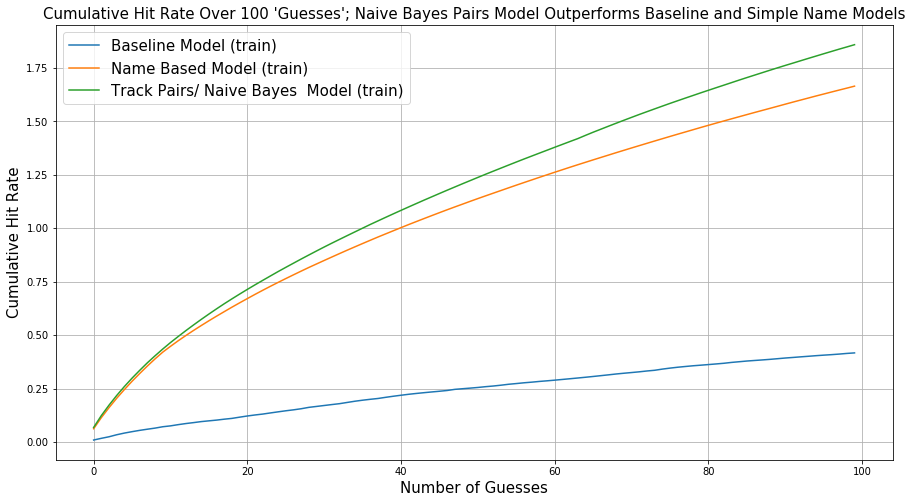

In [31]:
#plot test accuracy for baseline model and our simple name model
plt.figure(figsize=(15,8))
plt.plot(df_baseline.CumHits_Trn, label='Baseline Model (train)')
plt.plot(df_simplename.CumHits_Trn, label='Name Based Model (train)')
plt.plot(df_trackpairs.CumHits_Trn, label='Track Pairs/ Naive Bayes  Model (train)')
plt.title("Cumulative Hit Rate Over 100 'Guesses'; Naive Bayes Pairs Model Outperforms Baseline and Simple Name Models", fontsize=15)
plt.xlabel('Number of Guesses', fontsize=15)
plt.ylabel('Cumulative Hit Rate', fontsize=15)
plt.grid()
plt.legend(fontsize=15)

In [34]:
print("Model Performance on Training Data")
print('baseline model correct guesses out of 100:', np.max(df_baseline.CumHits_Trn))
print('simple name model correct guesses out of 100:', np.max(df_simplename.CumHits_Trn))
print('track pairs correct guesses out of 100:', np.max(df_trackpairs.CumHits_Trn))

Model Performance on Training Data
baseline model correct guesses out of 100: 0.41656403
simple name model correct guesses out of 100: 1.66465621
track pairs correct guesses out of 100: 1.85866737


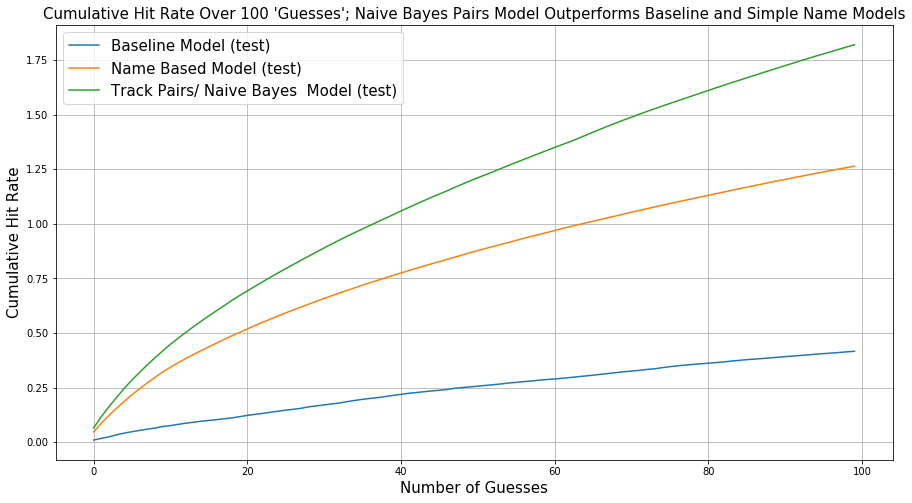

In [29]:
#plot test accuracy for baseline model and our simple name model
plt.figure(figsize=(15,8))
plt.plot(df_baseline.CumHits_Tst, label='Baseline Model (test)')
plt.plot(df_simplename.CumHits_Tst, label='Name Based Model (test)')
plt.plot(df_trackpairs.CumHits_Tst, label='Track Pairs/ Naive Bayes  Model (test)')
plt.title("Cumulative Hit Rate Over 100 'Guesses'; Naive Bayes Pairs Model Outperforms Baseline and Simple Name Models", fontsize=15)
plt.xlabel('Number of Guesses', fontsize=15)
plt.ylabel('Cumulative Hit Rate', fontsize=15)
plt.grid()
plt.legend(fontsize=15)

In [35]:
print("Model Results on Test Data:")
print('baseline model correct guesses out of 100:', np.max(df_baseline.CumHits_Tst))
print('simple name model correct guesses out of 100:', np.max(df_simplename.CumHits_Tst))
print('track pairs correct guesses out of 100:', np.max(df_trackpairs.CumHits_Tst))

Model Results on Test Data:
baseline model correct guesses out of 100: 0.41616
simple name model correct guesses out of 100: 1.26377
track pairs correct guesses out of 100: 1.81985


As the charts above demonstrate, our Naive Bayes Track Pairs model outperformed our baseline model and simple playlist model, peaking out at 1.82 correct guesses out of 100.On average our baseline model accurately
predicted 0.42 tracks on test and training data. Our playlist name based model did significantly better, accurately predicting 1.665 tracks in the training set and 1.264 in our test set. However, our Naive Bayes Track Pairs model showed the strongest performance correctly guessing 1.86 tracks on training data and 1.82 on test data.   While on stand alone basis, these results do not seem very impressive, on relative basis we now have a model that does 4x times better than a moderately educated guess. We believe that this is something to get excited about.

## Predicting With the Stacked Model

The idea of the Stacked Model was to create an ensemble prediction combining the Simple Name and Track Pair models.  This idea seemed promising and I had high hopes for it.  Due to very limited time when I attempted to estimate this model, I was unable to get both underlying predictors into Python to try to train a "real" model like a logistic regression using the predicted frequencies for tracks between playlist name and track pair.  Instead, I took a quick and dirty estimate of this model in SQL.  I assembled the top 256 candidates in each component model and converted the frequency of each candidate track into a pseudo-probability by dividing by the total frequency of that predictor.  If a track appeared in one category (e.g. simple name) but not the other (e.g. track pair), its pseudo-probability in the track pair model was recorded as zero.  This operation in SQL was accomplished with a combination of the UNION clause and a coalesce function that mapped missing (null) frequencies to zero.

Through trial and error, I found that a combination of 75% on the TrackPair model and 25% on the Simple Name model appeared to do reasonably well on a subset of the test set (the first 10,000 rows out of 100,000).  I estimated this whole model and was disappointed to see that it performed marginally worse than the original TrackPair model.  I am not ready to give up entirely on the idea of ensembling predictions based on both the playlist name and track pair information.  But for the available time on this project it did not work as well as the more straightforward Track Pair model, so I will not present the details of its implementation here.

## Act 3:

## Survey Architecture 

### Research Question:
Can we approximate parity on a chosen set of diversity metrics (i.e., artist gender and artist tier) in a song recommender system without decreasing user satisfaction when compared to a recommender system that does not include diversity as a goal?


### Experimental Model:

<img width="600" length='1200' alt="portfolio_view" src=exp_model.png>

### Experimental Procedures:
--Administered survey with a goal of 100 participants.Achieved 182 participants with 42 complete surveys.
--Collected track URIs of songs submitted through survey
--Built predictive model without diversity component
--Built predictive model with diversity component.
--Randomly assigned experimental participants into 4 groups (random playlist, Spotify playlist, Team #44 playlist without diversity component, Team #44 playlist with diversity component)
--Modeled playlists for each participant dependent on their group assignment
--Sent out follow up survey, and instructions.
--Analyzed follow up survey responses.


## Recommending Playlists to Survey Participants

As part of our experimental design, we generated recommendations for all survey participants using two strategies.  The first strategy was the Naive Bayes model using track pairs.  This was a "neutral" strategy and was selected because it had the best performance in predicting the last 10 tracks in the test set.  The second strategy was a modified track pair model.  The modification was designed to increase the rate at which a selected group of promoted artists had their tracks recommended.  In this case, the promoted artists comprised a sample of all the female mid-tier artists on the Spotify system as of the time that Avriel ran a query to that effect.  Her query generated a list of approximately 14,000 artists, keyed by Spotify's ArtistUri field.  This table was imported into the database table named PromotedArtist.  We were only able to recommend artists who were present in our sample data; there was an overlap of 10,082 artists.

The neutral recommendation strategy was essentially identical to the track pairs strategy in the training and test sets.  The only practical implementation difference is that all of the tracks in the survey responder's playlist were visible; in the training and testing we needed to hold out the last 10.  Below is an example of the layout of the survey data.  To protect user privacy, I will only share my own survey responses.

In [134]:
fl = ['SurveyResponse', 'SurveyPlaylist', 'SurveyPlaylistEntry', 'Track', 
      'SurveyRecommendations', 'SurveyRecommendationsPromoted']
frames = load_frames(fl)

Loaded SurveyResponse.
Loaded SurveyPlaylist.
Loaded SurveyPlaylistEntry.
Loaded Track.
Loaded SurveyRecommendations.
Loaded SurveyRecommendationsPromoted.

Loaded 6 Data Frames.
Elapsed Time: 1.93 seconds.


**One Survey Response Record**

In [135]:
# Filter the SurveyResponse frame for one user's response
df = frames['SurveyResponse']
idx = df.index[df.RecipientEmail =='michael.s.emanuel@gmail.com']
df.iloc[idx.values[0]]

SurveyResponseID                                                   20
RecipientName                                      Michael S. Emanuel
RecipientEmail                            michael.s.emanuel@gmail.com
SpotifyUserName                                            1262176408
PlaylistUrl_1       https://open.spotify.com/user/1262176408/playl...
PlaylistUrl_2       https://open.spotify.com/user/1262176408/playl...
PlaylistUrl_3       https://open.spotify.com/user/1262176408/playl...
PlaylistUri_1        6ypozSO7dBAM72MGVe7zkH?si=2w4b79U2TySRiGHrY-8EKA
PlaylistUri_2        60fNcluTJJgs3iEC3ekOZb?si=Hn1CPJqqT7uPkl9ahBzmjg
PlaylistUri_3        2gN8PrwCh1NXTSjiXaqoOw?si=-OdePYScTuCNNTN7z5zOIA
Name: 19, dtype: object

**Three Playlists Sumbitted by One Survey Participant**

In [136]:
# The SurveyResponseID of this survey participant
sr_id = frames['SurveyResponse'].iloc[idx].SurveyResponseID.values[0]
# A mask to filer just this user's responses back
mask_pl = frames['SurveyPlaylist'].SurveyResponseID == sr_id
frames['SurveyPlaylist'][mask_pl]

,SurveyPlaylistID,SurveyResponseID,PlaylistNum,PlaylistUri,PlaylistName,PlaylistSimpleName
57,58,20,1,6ypozSO7dBAM72MGVe7zkH?si=2w4b79U2TySRiGHrY-8EKA,Virtuoso Piano,NaN
58,59,20,2,60fNcluTJJgs3iEC3ekOZb?si=Hn1CPJqqT7uPkl9ahBzmjg,Symphonies,NaN
59,60,20,3,2gN8PrwCh1NXTSjiXaqoOw?si=-OdePYScTuCNNTN7z5zOIA,Chamber Music,NaN


Above we can see the three playlists I submitted.  The names of my playlists were "Virtuoso Piano", "Symphonies" and "Chamber Music"  The three NaN entries are a jarring reality check about the limitations of the simple playlist name approach implemented here.  Even over one million playlists, all three of the above playlist titles were unrecognized!  (I double checked this with a manual query on the database, and it's not a coding error.  There are playlists named "Symphonic", "symphonic", and "symphonic!!!" in the MPD, but nobody named a playlist "Symphonies").  These examples are of course very challenging because Spotify is primarily a popular music service and classical music fans are a quite small constituency.  Let's explore the tracks on the Virtuoso Piano plyalist to see the inputs considered by the Track Pairs model.

**Playlist Entries on One Participants Playlists**

In [137]:
# The three SurveyPlaylistIDs 
pids = frames['SurveyPlaylist'][mask_pl][['SurveyPlaylistID']]
# The playlist entries (IDs only)
df = frames['SurveyPlaylistEntry']
# Filter the survey playlist entries to the three selected playlists
df = pd.merge(left=pids, right=df, on='SurveyPlaylistID')
# Join these entries on the track table
output_cols = ['SurveyPlaylistID', 'Position', 'TrackName']
df = pd.merge(left=df, right=frames['Track'], on='TrackID')[output_cols]
df

,SurveyPlaylistID,Position,TrackName
0,58,24,Pictures at an Exhibition: Promenade
1,58,25,Pictures at an Exhibition: Gnomus
2,58,26,Pictures at an Exhibition: Promenade
3,58,27,Pictures at an Exhibition: Il vecchio castello
4,58,28,Pictures at an Exhibition: Promenade
5,58,29,Pictures at an Exhibition: Tuileries
6,58,30,Pictures at an Exhibition: Bydlo
7,58,31,Pictures at an Exhibition: Promenade
8,58,32,Pictures at an Exhibition: Ballet of the Unhat...
9,58,33,Pictures at an Exhibition: Samuel Goldenberg &...


This table shows the information content available to Track Pair prediction model.  If you had seen my original playlists and had a passing familiarity with classical music, you would see that the prediction task ranges from quite challenging to almost hopeless due solely to poor data coverage.  The first playlist I submitted, Virtuoso Piano, had 46 tracks.  It included Beethoven piano sonatas, Chopin etudes, Schubert impromptus, and Pictures at an Exhibition by Moussorsgy.  Of these 46 tracks, only the 15 tracks in Pictures at an Exhibition were recognized by the data set.  The Symphonies playlist fared about as badly.  24 tracks dropped down to 8.  The Chamber Music playlist was almost a complete whiff.  Out of 19 tracks including some of the most popular chamber music works in the reprtory, only one track (a single movement of Mozart's A major clarinet quintet) was recognized.  This example is a self contained demonstration of why it is so hard to limit the number of tracks and / or playlists under consideration in this problem if you want to do anything other than make plausible recommendations to people who are interested in the most popular tracks.  The world of music is large and deep.

The mechanical steps of generating survey recommendations in the unadjusted Track Pair model are so similar the code presented above that I will omit it here.  The only interesting detail is that I used the full TrackPair table rather than the bandwidth limited table.  This was because some survey participants weren't getting the full slate of 10 recommendations if the tracks on their initial playlist had only a small number of hits.  A more interesting question is how we generated recommendations that promoted female midtier artists.  This is described below.

**Recommendations to Extend the "Virtuoso Piano" Playlist**

In [141]:
# The survey playlist ID to explore 
spid = 58
df = frames['SurveyRecommendations']
mask = (df.SurveyPlaylistID == spid)
output_cols = ['Position', 'Frequency', 'TrackName']
df[mask][output_cols]

,Position,Frequency,TrackName
570,1,17,"Toccata, Adagio & Fugue in C Major, BWV 564: P..."
571,2,16,"Adagio for Strings from the String Quartet, Op..."
572,3,16,"Adagio for Strings, Op.11"
573,4,16,Pines Of Rome
574,5,16,Symphony No.5 In C Sharp Minor: 4. Adagietto (...
575,6,16,The Lark
576,7,16,Adagietto from Symphony No. 5 in C-sharp minor
577,8,16,Pictures At An Exhibition: The Great Gate Of Kiev
578,9,16,Pictures At An Exhibition: Promenade I
579,10,16,Pictures At An Exhibition - Orchestrated By Ma...


This example is quite informative about the strengths and limitations of 

### Generating Recommendations that Promoted a Selected Group of Artists

The goal of the modified recommendations was to promote artists in a selected group; here, that group was the approximately 10,000 female mid-tier artists enumerated in the table PromotedArtist.  The baseline recommendations are generated by starting from the visible tracks on a survey playlist, then joining these tracks on the full TrackPair table, and predicting the top 10 tracks that are not duplicates.  Each one of the resulting track frequencies can thus be viewed as an un-normalized probability in the Naive Bayes model.  The idea behind boosting the promoted artists was very simple.  We set a policy amplification rate of 2.0. Every artist that was part of the promoted group had their frequency muliplied by this factor.  These adjusted frequencies were then used to generate the recommendations.  Here is the SQL code that does this:

`11_v_SurveyRecommendPromoted.sql` / **Recommend Tracks Favoring Promoted Artists Based on One Survey Playlist**

```mysql
DROP VIEW IF EXISTS v.SurveyRecommendationsPromoted;
GO

CREATE VIEW v.SurveyRecommendationsPromoted
AS

WITH t1 AS (
SELECT
  -- Integer IDs
  sp.SurveyPlaylistID,
  tr.TrackID,
  -- Description of the Playlist
  sr.RecipientName,
  sr.RecipientEmail,
  sp.PlaylistName,
  sp.PlaylistNum,
  -- Recommendations
  row_number() OVER
    (partition BY sp.SurveyPlaylistID
     ORDER BY pr.Frequency * COALESCE(par.PromotionFactor, 1.0) DESC)
     AS Position,
  pr.Frequency * COALESCE(par.PromotionFactor, 1.0) AS AdjustedFrequency,
  -- The recommended track
  tr.TrackName,
  tr.TrackUri
FROM
  -- Start with all survey preditions
  dbo.SurveyPrediction AS pr
  -- The survey playlist
  INNER JOIN dbo.SurveyPlaylist AS sp ON
    sp.SurveyPlaylistID = pr.SurveyPlaylistID
  -- The track predicted
  INNER JOIN dbo.Track AS tr ON
    tr.TrackID = pr.TrackID
  -- The PromotedArtist on this track if applicable
  LEFT JOIN dbo.PromotedArtist AS par ON
    par.ArtistID = tr.ArtistID
  -- The survey response
  INNER JOIN dbo.SurveyResponse AS sr ON
    sr.SurveyResponseID = sp.SurveyResponseID
)
SELECT
  t1.SurveyPlaylistID,
  t1.TrackID,
  t1.RecipientName,
  t1.RecipientEmail,
  t1.PlaylistName,
  t1.PlaylistNum,
  t1.Position,
  t1.AdjustedFrequency,
  t1.TrackName,
  t1.TrackUri,
  row_number() OVER (ORDER BY t1.SurveyPlaylistID, t1.Position)
    AS SortOrder
FROM
  t1
WHERE
  t1.Position <= 10;
```

The database view above is using a different view called v.SurveyPredictions that is essentially replicating the predictions in the TrackPair model using the survey playlists as input.  The only interesting wrinkle here is the left join onto the PromotedArtist table.  This is where the promotion factor of 2.0 is picked up.  The coalesce(par.PromotionFactor, 1.0) has the effect of leaving non-promoted artists unchanged.  This design could allow different promotion rates for each artist.  In practice they were all set to 2.0.

### Effect of Promoting Selected Arists on their Recommendation Rate

We can estimate the prevalence of recommending promoted artists before and after this change.  This was estimated across the entire data set rather than the surveys, because the survey data set was small.  The overall rate with which female midtier artists appeared in the top 100 recommended tracks was approximately **0.8576\%** before any adjustment was applied.  Applying a 2.0x factor to the frequency of these tracks increased their appearance rate to **1.3209\%** in the top 100 tracks, i.e. increased them by a factor of 1.54.  This factor was not the same as the 2.0x factor applied to the frequencies, because increasing a frequency is not a linear mapping to appearing in the top 100.  To take an extreme example, if an obscure track had a frequency of 1, it would never appear in the top 100 even if we multiplied its frequency by huge promotion factor like 100.

The small absolute size of the female midtier artists is an indication that measuring an effect from this intervention would be very challenging even if we had a larger sample size.  When we designed the study, we specified the largest possible set of promoted artists to mitigate this effect.  In particular, artists on Spotify are ranked into 5 tiers 1 through 5, with 1 being the most popular and 5 being the most obscure.  The initial proposal was to promote female artists in teirs 3-5, but we modified that to include tiers 2-5 to make the promoted group larger.  Even with that change, they are representing a very small slice of the tracks people put on playlists.  The underlying reality is that the music industry is very much a "winner take all" type of business, with the top artists (in tier 1) getting the lion's share of both the money and listening time.

## Survey Results

Given that only 22 participants responded to our follow up survey, we need to take our results with a grain of salt. Our margin of error here is 1/sqrt(22)=21%[5]. However, we still view the survey results as encouraging (albeit at a very small scale) and an important marker for how our algorithm might perform out in the field.

In [89]:
print('margin of error in our sample:',1/(22)**(1/2))

margin of error in our sample: 0.21320071635561041


In [113]:
Team_44_not_promoted = pd.read_csv("not_promoted.csv")
Team_44_promoted = pd.read_csv("promoted.csv")
Spotify = pd.read_csv("spotify_rec.csv")
Random = pd.read_csv("random.csv")
summary = pd.read_csv('summary.csv')

In [114]:
summary.set_index('Playlist type', inplace=True)


In [121]:
df_summary=pd.DataFrame(index=['not_promoted','promoted','spotify','random'], columns=['Satisfied','Neutral','Dissatisfied'])
df_summary['Satisfied']=(summary['Moderately satisfied']+summary['Slightly satisfied']+summary['Extremely satisfied'])/(summary['Moderately satisfied']+summary['Slightly satisfied']+summary['Extremely satisfied']+summary['Neither satisfied nor dissatisfied']+summary['Slightly dissatisfied']+summary['Extremely dissatisfied'])
df_summary['Neutral']=summary['Neither satisfied nor dissatisfied']/(summary['Moderately satisfied']+summary['Slightly satisfied']+summary['Extremely satisfied']+summary['Neither satisfied nor dissatisfied']+summary['Slightly dissatisfied']+summary['Extremely dissatisfied'])
df_summary['Dissatisfied']=1-df_summary['Satisfied']-df_summary['Neutral']
df_summary
df_summary.index=['Team44 Model w/out mid-tier artists','Team44 with mid-tier artists','Spotify Recommender','Random']


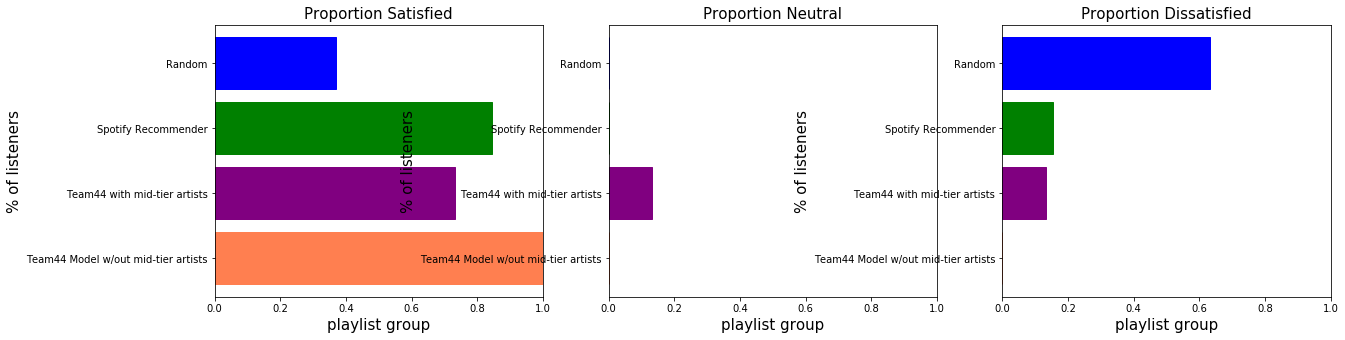

In [122]:
fig = plt.figure()
fig.set_size_inches(20,5)
titles=['Proportion Satisfied','Proportion Neutral','Proportion Dissatisfied']
columns=['Satisfied','Neutral','Dissatisfied']
i=1
while i <4:
    plt.subplot(1, 3,i)
    bars=plt.barh(df_summary.index,df_summary[columns[i-1]])
    bars[0].set_color('coral')
    bars[1].set_color('purple')
    bars[2].set_color('green')
    bars[3].set_color('blue')
    plt.title(titles[i-1], fontsize=15)
    plt.xlabel('playlist group', fontsize=15)
    plt.xlim(0,1)
    plt.ylabel('% of listeners', fontsize=15)
    i=i+1
    
    

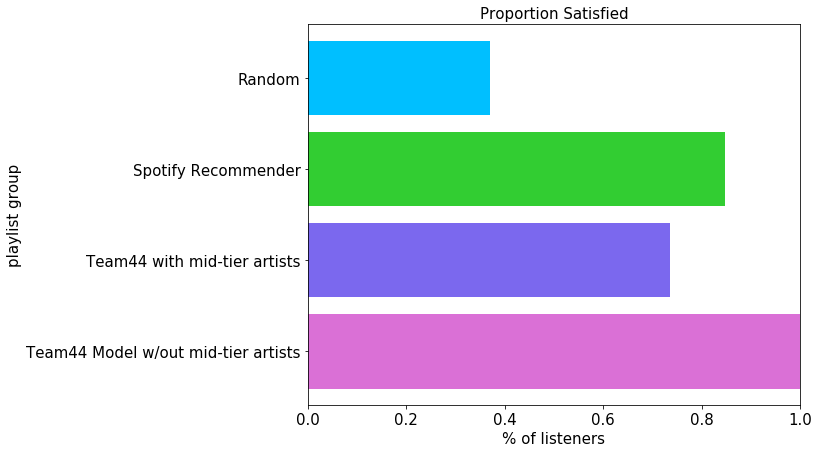

In [123]:
fig = plt.figure()
fig.set_size_inches(30,7)
titles=['Proportion Satisfied']
columns=['Satisfied']
i=1
while i <2:
    plt.subplot(1, 3,i)
    bars=plt.barh(df_summary.index,df_summary[columns[i-1]], align='center',edgecolor='black', linewidth=2)
    bars[0].set_color('orchid')
    bars[1].set_color('mediumslateblue')
    bars[2].set_color('limegreen')
    bars[3].set_color('deepskyblue')
    plt.title(titles[i-1], fontsize=15)
    plt.ylabel('playlist group', fontsize=15)
    plt.xlim(0,1)
    plt.xlabel('% of listeners', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    i=i+1

When it came to overall user satisfaction with our playlists, we note that it appears that our model did a decent job keeping up with Spotify. However, keep in mind we have a very high margin of error and the results are not particularly reliable.  In the future, we would be interested in conducting this survey on a much larger sample that would bode well for statistical significance of our results.

In [6]:
q1 = summary.filter(['Extremely satisfied','Moderately satisfied','Slightly satisfied','Neither satisfied nor dissatisfied',
                    'Slightly dissatisfied','Moderately dissatisfied','Extremely dissatisfied'], axis = 1)
q2 = summary.filter(['The entire playlist','Most of the playlist','About half the playlist',
                    'Some of the playlist', 'One or two songs','Did not listen' ], axis = 1)
q3 = summary.filter(['Yes, most of them', 'Yes, many of them', "Yes, a few", "No"], axis =1)
q4 = summary.filter(["Yes, unique", "No, not unique", "Don't remember"], axis = 1)

Text(0,0.5,'Number of responses')

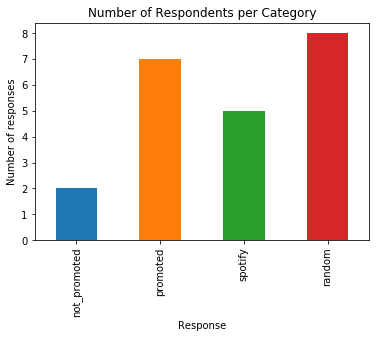

In [7]:
ax = summary.responses.plot(kind='bar')
ax.set_title("Number of Respondents per Category")
ax.set_xlabel("Response")
ax.set_ylabel("Number of responses")

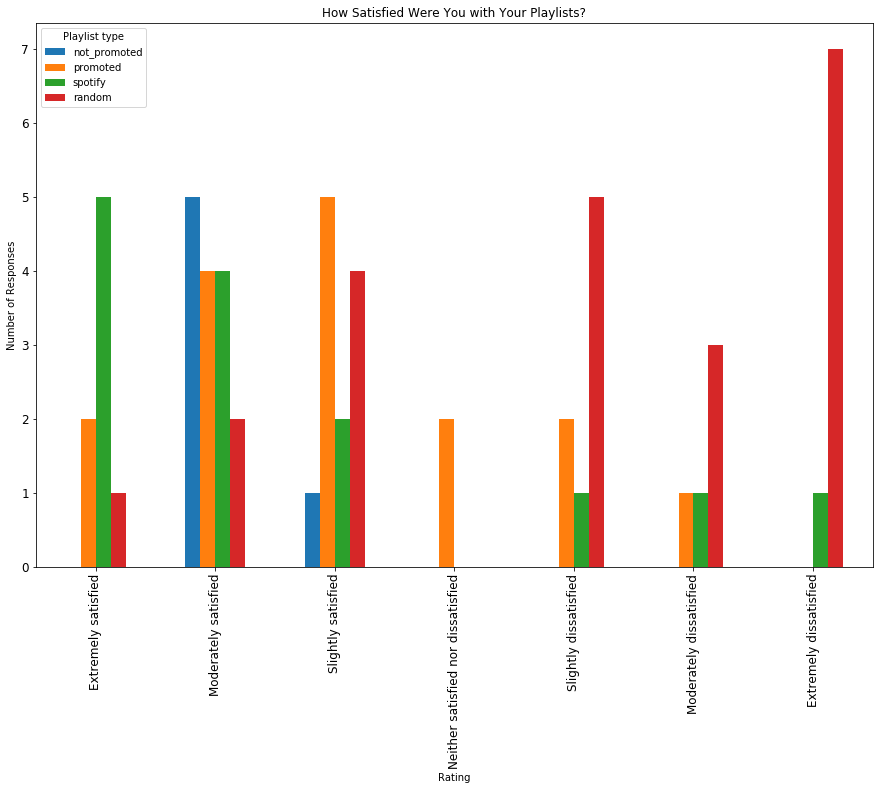

In [57]:
q1_plot = q1.transpose().plot(kind='bar', title ="How Satisfied Were You with Your Playlists?", figsize=(15, 10), legend=True, fontsize=12)
q1_plot.set_xlabel('Rating')
q1_plot.set_ylabel('Number of Responses');

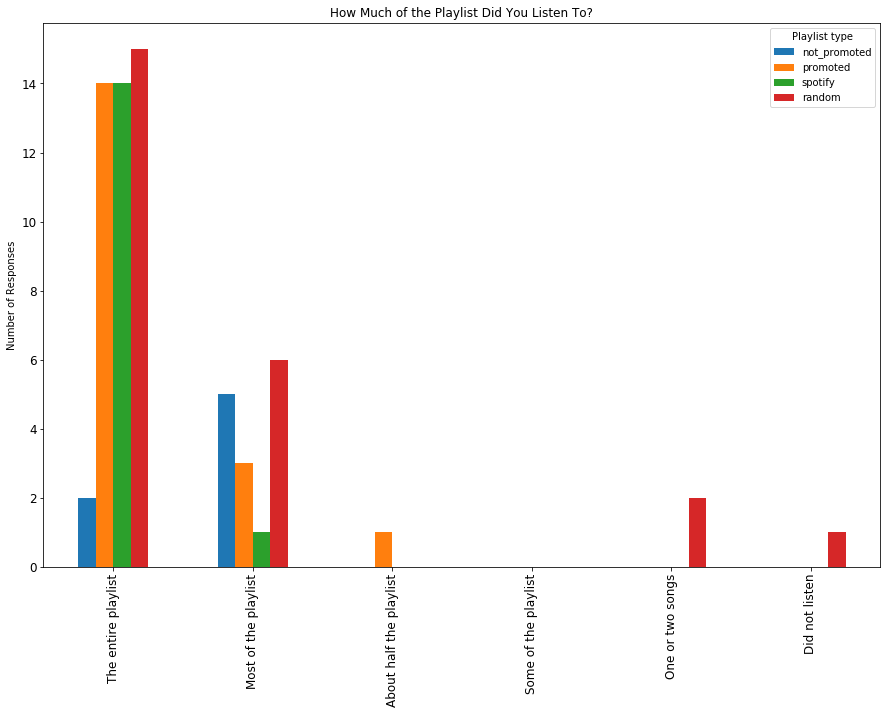

In [56]:
q2_plot = q2.transpose().plot(kind='bar', title ="How Much of the Playlist Did You Listen To?", figsize=(15, 10), legend=True, fontsize=12)
q2_plot.set_ylabel('Number of Responses');

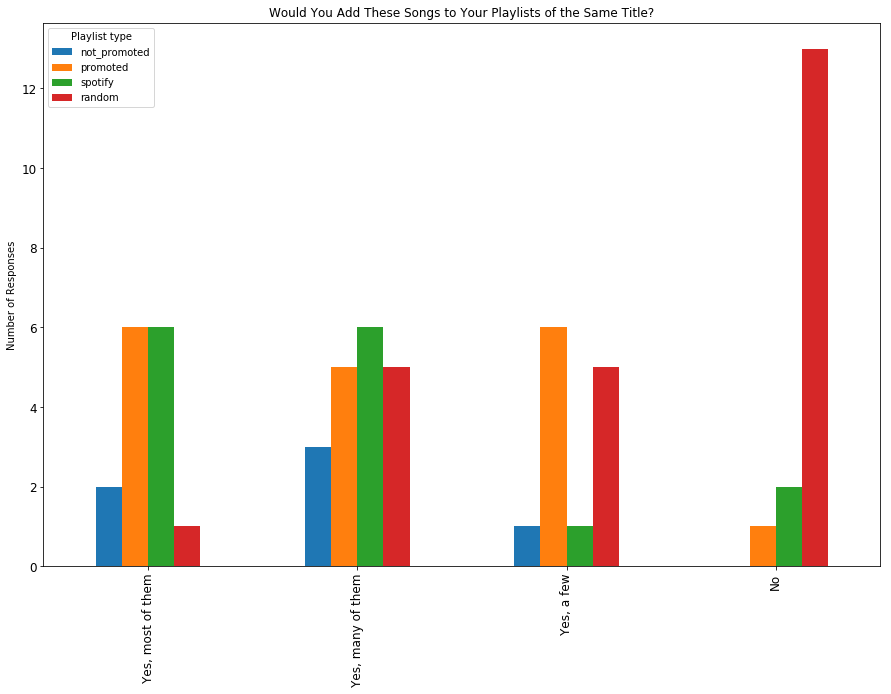

In [58]:
q3_plot = q3.transpose().plot(kind='bar', title ="Would You Add These Songs to Your Playlists of the Same Title?", figsize=(15, 10), legend=True, fontsize=12)
q3_plot.set_ylabel('Number of Responses');

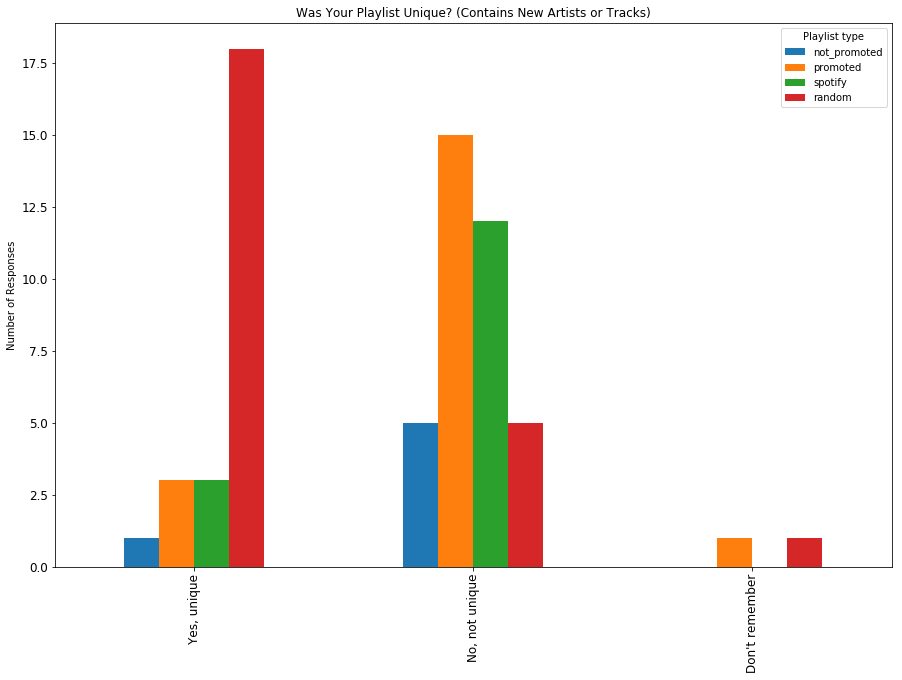

In [59]:
q4_plot = q4.transpose().plot(kind='bar', title ="Was Your Playlist Unique? (Contains New Artists or Tracks)", figsize=(15, 10), legend=True, fontsize=12)
q4_plot.set_ylabel('Number of Responses');

### Conclusions:

While we did not invent the next best music recommender, we successfull accomplished our project goals and made some headway towards building more diversity into a male dominated, top. First, we built a model that accurately predicts nearly 2% of the listeners last 10 tracks, which 4x better than what we would have accomplished by simply taking an educated guess.  Second, we deployed our model to a random group of listeners and the initial results, albeit not statistically significant, show our model keeping up with Spotify's current algorithm.  Finally  


### Future Work

In [ ]:
-ANCOVA to compare survey results
-Bigger Survey
-Using Audio Features
-Using Lyrics
-Going beyond mid-tier females
-Improving Stacked Model
-KNN model
_

### Citations

## Appendix

In [119]:
#exploring audio features
features=df_audio_features.columns.values
features[5:]

array(['Acousticness', 'BeatStrength', 'Bounciness', 'Danceability',
       'Duration', 'Energy', 'Flatness', 'Instrumentalness',
       'KeySignature', 'Speechiness', 'Liveness', 'Loudness', 'Valence',
       'Tempo', 'TimeSignature', 'Genres', 'MetaGenres'], dtype=object)

/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'frequency')

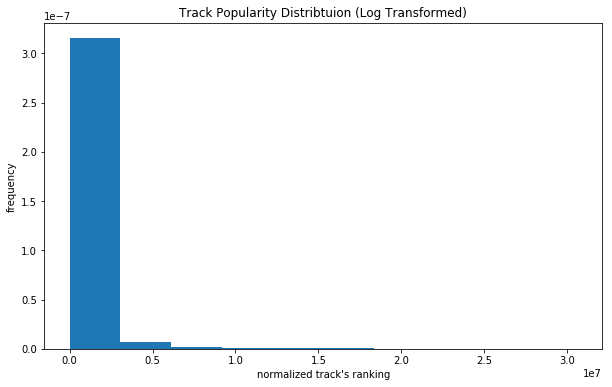

In [120]:
#plot track popularity distribution
plt.figure(figsize=(10,6))
plt.hist((df_audio_features.TrackPopularityRank), normed='True')
plt.title("Track Popularity Distribtuion (Log Transformed)")
plt.xlabel("normalized track's ranking")
plt.ylabel("frequency")

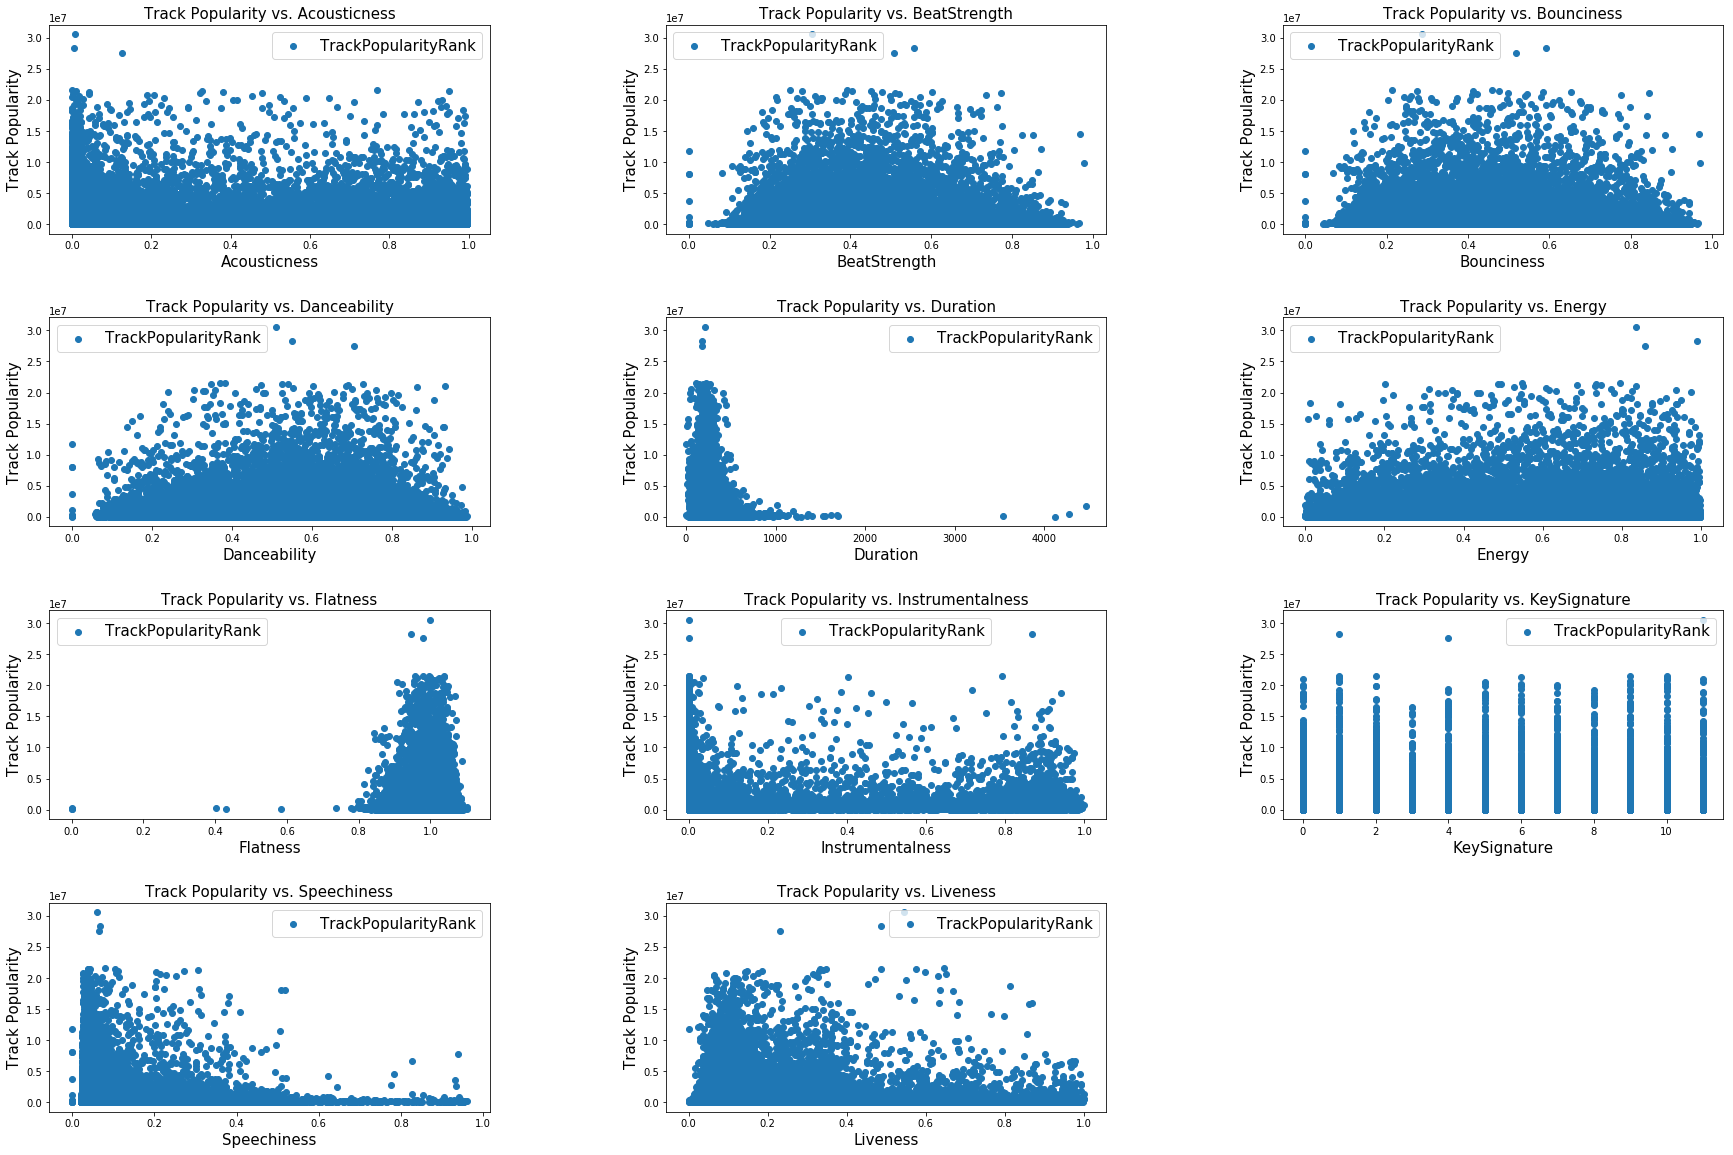

In [121]:
#plot track popularity vs. audio features
fig = plt.figure()
fig.set_size_inches(30,20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 12):
    ax = fig.add_subplot(4, 3, i)
    plt.scatter( df_audio_features[features[i+4]], df_audio_features.TrackPopularityRank)
    plt.title(f'Track Popularity vs. {features[i+4]}', fontsize=15)
    plt.xlabel(features[i+4], fontsize=15)
    plt.ylabel('Track Popularity', fontsize=15)
    plt.legend(fontsize=15)


## Idea for the Future: k-NN Using a Playlist Pair Metric

We've seen above how to construct a Track Pair matrix
$$TP = X^T \cdot X$$
We could apply the exact same idea, but use matrix transposes to generate a Playlist Pair matrix as follows:
$$PP = X \cdot X^T$$
Just as the Track Pair matrix is an indication of the strength of correlation bewteen two tracks, the playlist pair matrix will have high entries on cells (i, j) where the two playlists are similar.  If we converted from the raw frequencies to a correlation by dividing out by the number of entries in the two playlist, we could attempt create a notion of correlation between two playlists.  We could then attempt to predict the next tracks on a playlists by finding its nearest neighbors.

I believe that this model is quite promising.  Unfortunately I did not have time to pursue it.  I attempted to estimate it but the calculation bogged down and I did not have enough time to bring it to completion.  I spent enough time working on it though to identify it as a promising avenue of exploration in the future if I came back to this problem.